#  <span style="color:#3366ff"> <strong> Catégoriser des questions automatiquement (Arnaud ROUSSEAU) </strong>

#  <span style="color:#3366ff"> <strong> 20180912 Part 2 Cleaned

#  <span style="color:#ff0000"> <strong> Version 5000/ NO Stopwords! / Double  

<span style="color:#3366ff"> This notebook is dedicated to the data engineering (lemmatized, no stopword, and no duplicate).

### Librairies Import

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn import preprocessing, decomposition, cluster, metrics, neighbors
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.neural_network import MLPClassifier

import nltk
from nltk.tokenize import word_tokenize

from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding

from collections import Counter
import string
import re

/home/ubuntu/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Database loading

In [2]:
data_text = pd.read_csv(
    'DATA_clean/20180911_data_Text_5000_double.csv', 
    #sep='\t', 
    index_col=0,
    encoding='utf-8', 
    low_memory = False)

data_test = pd.read_csv(
    'DATA_clean/20180911_data_Text_5000_double_test.csv', 
    #sep='\t', 
    index_col=0,
    encoding='utf-8', 
    low_memory = False)

pd.options.display.max_columns=999
data_text.head(15)

,Text_OK,Tags_OK
0,want use track bar change form opacity code de...,c# floating-point type-conversion double ...
1,use,html css css3 internet-explorer-7
2,value,c# datetime time datediff relative-time-s...
3,net,.net math
4,work,c# linq web-services .net-3.5
5,value using double work build tried,performance algorithm language-agnostic un...
6,error,mysql database triggers
7,work type using following use,c++ c sockets mainframe zos
8,using tried following,arrays actionscript-3 flex
9,using net application want change use followin...,sql sql-server datatable rdbms


In [3]:
shapetest = data_text.shape

print("This SAMPLED database contains",shapetest[0], 
      "questions/titles.")

This SAMPLED database contains 18075 questions/titles.


## <span style="color:#6600cc">  "Text":  Tok and counting --> Frequency

In [4]:
count_vect = CountVectorizer()

X_text_counts = count_vect.fit_transform(data_text["Text_OK"])
X_text_counts.shape

(18075, 32)

In [5]:
test = count_vect.vocabulary_.get(u'algorithm')
test

In [6]:
X_text_counts.toarray()

array([[1, 1, 1, ..., 1, 1, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [7]:
X_f = pd.DataFrame(X_text_counts.toarray(), columns = [count_vect.get_feature_names()])

In [8]:
X_f.shape

print("This table contains", X_f.shape[0],
      "lines described with",X_f.shape[1],
      "words (present or not)")

This table contains 18075 lines described with 32 words (present or not)


In [9]:
X_f.head(10)

,application,bar,build,change,code,control,convert,decimal,double,error,fine,following,form,give,gives,implicitly,net,opacity,past,project,track,trackbar,trans,tried,type,use,using,value,vb,want,work,worked
0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0
6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0
8,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
9,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0


<span style="color:#3366ff"> X_f = Text  Frequency

In [10]:
X_f.describe()

,application,bar,build,change,code,control,convert,decimal,double,error,fine,following,form,give,gives,implicitly,net,opacity,past,project,track,trackbar,trans,tried,type,use,using,value,vb,want,work,worked
count,18075.000000,18075.000000,18075.000000,18075.000000,18075.000000,18075.000000,18075.000000,18075.000000,18075.000000,18075.000000,18075.000000,18075.000000,18075.000000,18075.000000,18075.000000,18075.000000,18075.000000,18075.000000,18075.000000,18075.000000,18075.000000,18075.000000,18075.000000,18075.000000,18075.000000,18075.000000,18075.000000,18075.000000,18075.000000,18075.000000,18075.000000,18075.000000
mean,0.180415,0.020913,0.053167,0.067497,0.254661,0.080055,0.027828,0.003983,0.013499,0.091231,0.051508,0.093223,0.051840,0.001217,0.016155,0.001383,0.199225,0.000553,0.013167,0.095325,0.013333,0.000111,0.000332,0.070650,0.090124,0.327690,0.372503,0.084315,0.024343,0.226113,0.168631,0.019806
std,0.384543,0.143097,0.224373,0.250887,0.435683,0.271386,0.164486,0.062990,0.115403,0.287945,0.221037,0.290752,0.221709,0.034867,0.126075,0.037166,0.399429,0.023515,0.113994,0.293671,0.114701,0.010519,0.018217,0.256247,0.286368,0.469384,0.483485,0.277868,0.154116,0.418325,0.374436,0.139338
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### PCA sur X_f

In [540]:
# PCA preprocessing
data_text_f_prepro = preprocessing.scale(X_f)
pca1 = decomposition.PCA(n_components=2)
pca1.fit(data_text_f_prepro)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [541]:
print("Variance des 2 premieres composantes principales", 
      pca1.explained_variance_ratio_.cumsum())

Variance des 2 premieres composantes principales [0.05332143 0.09805318]


In [542]:
data_text_f_prepro_trans = pca1.transform(data_text_f_prepro)

# Cette base mesure
shape = data_text_f_prepro_trans.shape

print("Le tableau des Composantes Principales contient",shape[0], 
      "textes décrits dans", shape[1], "CP.")

Le tableau des Composantes Principales contient 18075 textes décrits dans 2 CP.


(-0.4, 0.5)

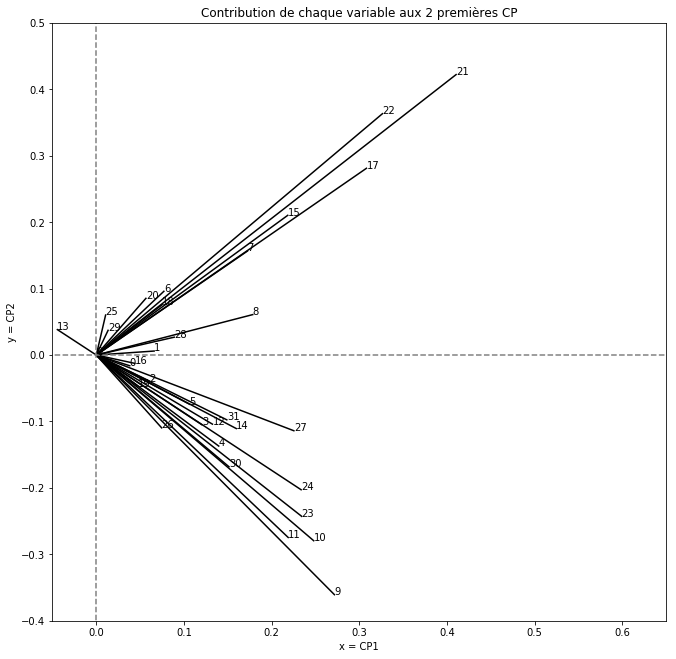

In [543]:
pcs1 = pca1.components_

fig = plt.figure(figsize=(11,11))
ax = plt.subplot()
ax.set_title('Contribution de chaque variable aux 2 premières CP')
plt.ylabel("y = CP2")
plt.xlabel("x = CP1")

for i , (x, y) in enumerate(zip(pcs1[0, :], pcs1[1, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, X_f.columns[i], fontsize='10')

# Afficher une ligne horizontale y=0
plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')
# Afficher une ligne verticale x=0
plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

plt.xlim([-0.05, 0.65])
plt.ylim([-0.4, 0.5])

<span style="color:#3366ff"> See Notebook part3 for correction

## <span style="color:#6600cc"> "Text" Term Frequency-Inverse Document Frequency --> TF-IDF

In [15]:
tfidf = TfidfVectorizer()
values_X_tfidf = tfidf.fit_transform(data_text['Text_OK'])

X_tfidf = pd.DataFrame(values_X_tfidf.toarray(), columns = [tfidf.get_feature_names()])
X_tfidf.head()

,application,bar,build,change,code,control,convert,decimal,double,error,fine,following,form,give,gives,implicitly,net,opacity,past,project,track,trackbar,trans,tried,type,use,using,value,vb,want,work,worked
0,0.100337,0.179969,0.14551,0.13669,0.087589,0.130382,0.169424,0.240901,0.196109,0.125551,0.146682,0.124753,0.146445,0.0,0.18949,0.279093,0.096669,0.310915,0.197026,0.123928,0.196565,0.358981,0.327636,0.135002,0.126002,0.078264,0.073523,0.128465,0.174364,0.091987,0.102835,0.181975
1,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000


In [16]:
X_tfidf.shape

(18075, 32)

In [17]:
values_X_tfidf.toarray()

array([[0.10033708, 0.17996911, 0.1455099 , ..., 0.09198694, 0.10283518,
        0.18197471],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.8066267 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

<span style="color:#3366ff"> <strong> Remarque: </strong> Il y a autant de "documents" (d de idf) qui il y a de lignes. Chaque valeur est prore à un mot du corpus.

<span style="color:#3366ff"> X_tfidf = Term Frequency-Inverse Document Frequency applied to "Text" 

### PCA sur X tfidf

In [18]:
# PCA preprocessing
data_text_prepro = preprocessing.scale(X_tfidf)
pca = decomposition.PCA(n_components=2)
pca.fit(data_text_prepro)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [19]:
print("Variance des 2 premieres composantes principales", 
      pca.explained_variance_ratio_.cumsum())

Variance des 2 premieres composantes principales [0.04174451 0.07961551]


In [20]:
data_text_prepro_trans = pca.transform(data_text_prepro)

# Cette base mesure
shape = data_text_prepro_trans.shape

print("Le tableau des Composantes Principales contient",shape[0], 
      "textes décrits dans", shape[1], "CP.")

Le tableau des Composantes Principales contient 18075 textes décrits dans 2 CP.


(-0.5, 0.5)

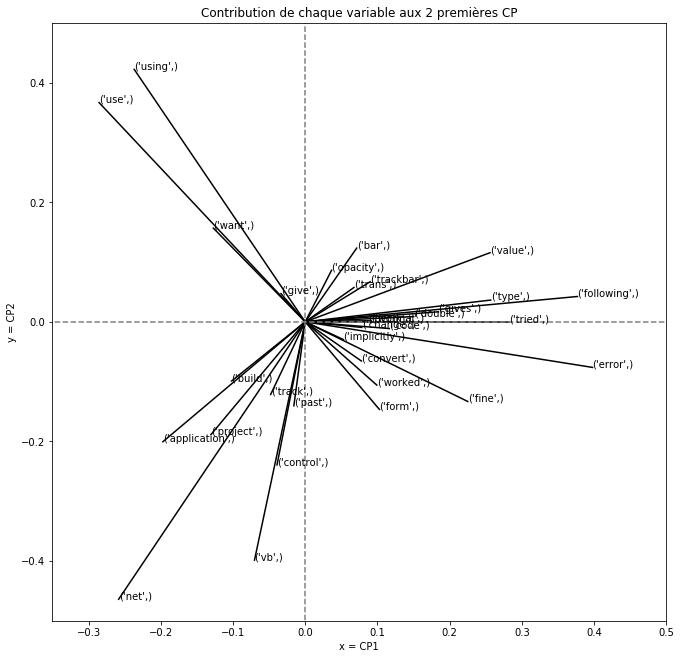

In [21]:
pcs = pca.components_

fig = plt.figure(figsize=(11,11))
ax = plt.subplot()
ax.set_title('Contribution de chaque variable aux 2 premières CP')
plt.ylabel("y = CP2")
plt.xlabel("x = CP1")

for i , (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, X_tfidf.columns[i], fontsize='10')

# Afficher une ligne horizontale y=0
plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')
# Afficher une ligne verticale x=0
plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

plt.xlim([-0.35, 0.5])
plt.ylim([-0.5, 0.5])

<span style="color:#3366ff"> Those words are too generic: it 's hard to see any tendancies.

## <span style="color:#6600cc"> "y Tags" Frequency

### CountVectorizer --> y_f

In [22]:
count_vect2 = CountVectorizer(max_features = 400)

y_tag_counts = count_vect2.fit_transform(data_text['Tags_OK'])

y_f = y_tag_counts.toarray()
y_f = pd.DataFrame(y_tag_counts.toarray(), columns = [count_vect2.get_feature_names()])
y_f.shape

print("There is",y_f.shape[1],
      "tags !")

There is 400 tags !


In [23]:
y_f.head()

,2000,2003,2005,2007,2008,64bit,access,actionscript,active,activerecord,ado,agile,agnostic,air,ajax,algorithm,analysis,and,ant,apache,api,app,application,applications,architecture,arrays,asp,assemblies,assembly,asynchronous,attributes,audio,authentication,automated,automation,backup,bash,batch,binary,binding,bit,boost,browser,build,caching,cakephp,casting,castle,ce,chrome,class,classic,client,clr,cocoa,code,coding,coldfusion,collection,collections,com,command,comments,compact,comparison,compiler,components,concurrency,config,configuration,connection,console,construction,content,continuous,control,controller,controls,cookies,crash,cross,cruisecontrol,crystal,css,csv,custom,cvs,data,database,datagridview,dataset,date,datetime,debugging,delphi,dependency,deployment,design,designer,desktop,development,diff,directory,django,dll,dns,documentation,dom,drop,dynamic,eclipse,editor,ee,emacs,email,embedded,encoding,encryption,engine,entity,enums,environment,error,events,excel,exception,explorer,features,file,files,filesystems,firefox,flash,flex,floating,fonts,format,formatting,forms,framework,frameworks,ftp,full,function,functional,garbage,gcc,gdi,generation,generics,git,google,graph,graphics,handling,hardware,hash,hibernate,hosting,html,http,https,ide,iis,image,import,indexing,inheritance,injection,installation,installer,integration,interface,internationalization,internet,interop,inversion,io,ios,iphone,java,javascript,jquery,jsf,json,jsp,keyboard,lambda,language,languages,layout,leaks,licensing,line,linker,linq,linux,lisp,list,listview,localization,locking,logging,lucene,macos,makefile,management,manipulation,maps,math,maven,memory,menu,merge,methods,mfc,migration,mime,mobile,mocking,mod,model,monitoring,mono,moss,ms,msbuild,multithreading,mvc,mysql,namespaces,naming,nant,net,netbeans,network,networking,nhibernate,objective,of,office,on,oop,open,opengl,openid,operating,optimization,oracle,orm,outlook,parsing,passwords,path,patterns,pdf,performance,perl,permissions,php,platform,plugins,point,pointers,post,postgresql,powershell,preprocessor,printing,procedures,process,processing,profiling,programming,project,projects,properties,proxy,python,qt,rails,random,refactoring,reference,reflection,regex,registry,reporting,reports,resharper,resources,rest,review,rewrite,routing,rss,ruby,schema,screen,scripting,scrum,search,security,serialization,server,service,services,servlets,session,sharepoint,shell,shortcuts,silverlight,smtp,soap,sockets,sorting,source,sourcesafe,spring,sql,sqlite,ssis,ssl,stack,statement,static,stl,stored,string,structures,studio,style,svn,swing,synchronization,syntax,sysadmin,system,tcp,tdd,templates,testing,tests,text,tfs,theory,time,to,tomcat,tortoisesvn,touch,tracking,transactions,tree,tsql,type,types,ubuntu,unicode,unit,unix,upload,url,user,utf,validation,variables,vb,vb6,vba,vbscript,version,versioning,video,view,vim,virtual,virtualization,vista,visual,vmware,wcf,web,webforms,webserver,winapi,windows,winforms,word,workflow,wpf,xaml,xcode,xhtml,xml,xp,xpath,xsd,xslt
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0

In [24]:
test = y_f.columns.levels
test

FrozenList([['2000', '2003', '2005', '2007', '2008', '64bit', 'access', 'actionscript', 'active', 'activerecord', 'ado', 'agile', 'agnostic', 'air', 'ajax', 'algorithm', 'analysis', 'and', 'ant', 'apache', 'api', 'app', 'application', 'applications', 'architecture', 'arrays', 'asp', 'assemblies', 'assembly', 'asynchronous', 'attributes', 'audio', 'authentication', 'automated', 'automation', 'backup', 'bash', 'batch', 'binary', 'binding', 'bit', 'boost', 'browser', 'build', 'caching', 'cakephp', 'casting', 'castle', 'ce', 'chrome', 'class', 'classic', 'client', 'clr', 'cocoa', 'code', 'coding', 'coldfusion', 'collection', 'collections', 'com', 'command', 'comments', 'compact', 'comparison', 'compiler', 'components', 'concurrency', 'config', 'configuration', 'connection', 'console', 'construction', 'content', 'continuous', 'control', 'controller', 'controls', 'cookies', 'crash', 'cross', 'cruisecontrol', 'crystal', 'css', 'csv', 'custom', 'cvs', 'data', 'database', 'datagridview', 'datas

<span style="color:#3366ff"> y_f = tags Frequency

### Test avec get dumm

In [25]:
data_text_tags_OK_dumm = data_text['Tags_OK'].str.get_dummies(sep=' ')
data_text_tags_OK_dumm.head()

,.emf,.htaccess,.htpasswd,.net,.net-1.0,.net-1.1,.net-2.0,.net-3.0,.net-3.5,.net-4.0,.net-assembly,.net-attributes,.net-client-profile,.net-framework-version,.net-micro-framework,.nettiers,.refresh,.sbr,16-bit,1wire,2-digit-year,256color,2d,3-tier,32-bit,3270,32bit-64bit,3d,3d-engine,3des,3gp,64bit,6502,68000,7zip,a-star,aac,aac+,abap,abcpdf,abi,abstract-class,abstract-syntax-tree,abstraction,accelerator,accelerometer,acceptance-testing,access-control,access-specifier,access-vba,accessibility,accessor,accordion,accordionpane,account,accounting,accounts,accurev,acid,acl,acoustics,acrobat,action,actionlink,actionlistener,actionmailer,actionscript,actionscript-2,actionscript-3,actionview,activation,active-directory,active-directory-group,activemq,activerecord,activereports,activeresource,activescaffold,activestate,activetcl,activex,acts-as-tree,actualwidth,ada,adam,adaptor,add-in,add-on,addclass,address-bar,adfs,adhoc,adhoc-queries,adjustable,adm2,admin,admin-rights,administration,administrator,ado,ado.net,adobe,adobe-captivate,adobe-illustrator,adobe-reader,adodb,adodb-php,adonetappender,adp,ads,adsense,adsi,adsl,advanced-queuing,advanceddatagrid,advantage-database-server,advertising,aero,aero-glass,aes,after-effects,agent-based-modeling,aggregate,aggregate-functions,agi,agile,agile-processes,aiml,aio,air,aix,ajax,ajax.net,ajaxcontroltoolkit,ajp,akamai,al.exe,alert,alerts,algebra,algebraic-data-types,algorithm,alias,alignment,allegro,allocation,alpha,alphablending,alsa,alt.net,alter-table,altova,amazon,amazon-ec2,amazon-s3,amazon-simpledb,amazon-web-services,amd-processor,amf,amfphp,analysis,analytics,anchor,anchor-modeling,android,android-activity,android-emulator,android-mapview,android-scripting,android-tabhost,animated-gif,animation,animationextender,ankhsvn,annotate,annotations,anonymous-function,anonymous-inner-class,anonymous-methods,anonymous-objects,anonymous-types,ansi,ansi-sql-92,ant,anti-join,anti-patterns,antialiasing,antivirus,antlr,antrunner,aop,apache,apache-coccoon,apache-commons-fileupload,apache-poi,apache2,apc,apex-code,api,api-design,app-code,app-config,app-store,appbar,appdomain,appearance,append,appfuse,apple-developer,apple-mail,applescript,applet,application-blocks,application-cache,application-data,application-integration,application-onerror,application-pool,application-settings,application-start,application-state,applicationpage,approximate-nn-searching,appsettings,apt,aptana,aquamacs,ar-mailer,arabic,arcgis,arcgis-js-api,architectural-patterns,architecture,archiva,archive,arcobjects,arduino,argotic,arguments,arithmetic-expressions,arm,array-initialize,arraylist,arrays,article,artifacts,artificial-intelligence,artificial-life,ascii,ascx,asdf,ase,ashx,asmx,asn.1,asp-classic,asp.net,asp.net-1.1,asp.net-2.0,asp.net-3.5,asp.net-ajax,asp.net-compiler,asp.net-dynamic-data,asp.net-membership,asp.net-mvc,asp.net-mvc-migration,asp.net-mvc-routing,asp.net-profiles,asp.net-routing,aspectj,aspell,asplinkbutton,aspnet-regiis.exe,assemblies,assembly,assemblyinfo,assert,assertions,asset-management,assets,associations,associative,associative-array,asterisk,astoria,asynchronous,atl,atlassian-fisheye,atmega,atom-feed,atomic,attachment,attachment-fu,attributes,audio,audio-analysis,audio-player,audit,audit-trail,authentication,authenticity,authkit,author,authority,authorization,authorize.net,auto-build,auto-increment,auto-indent,auto-ptr,auto-update,auto-versioning,autoboxing,autocomplete,autocompleteextender,autoconf,autogrow,autolayout,autoload,automake,automated-deploy,automated-tests,automatic-properties,automation,automator,autonumber,autopostback,autoproxy,autoresetevent,autorun,autosave,autosize,autostart,autotest,autotools,avi,avr,awk,awstats,awt,axacropdf,axapta,axes,axiom,axis,axis2,azman,b-tree,back-button,backend,background,background-color,background-image,backgroundworker,backlog,backport,backreference,backslash,backup,backupexec,backwards-compatibility,badge,balloon,balsamiq,baml,bandwidth,bankers-rounding,

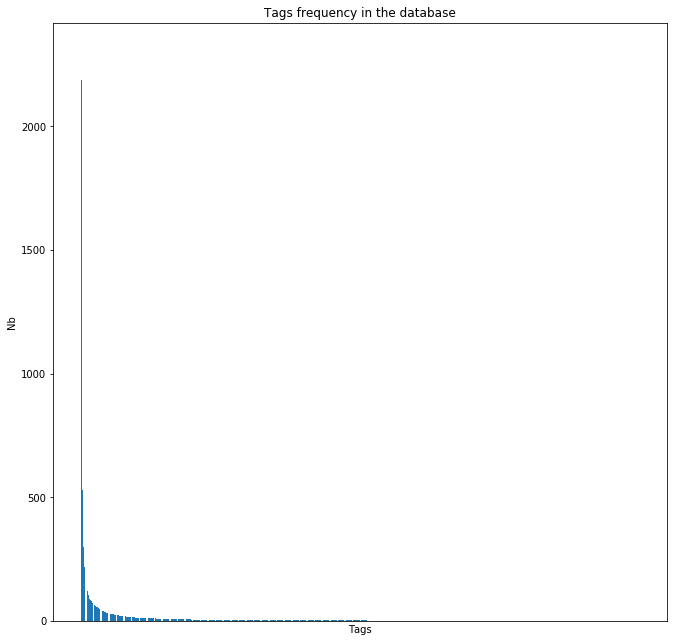

In [26]:
plt.figure(figsize=(11,11))
ax = plt.subplot()
ax.set_title("Tags frequency in the database")
plt.xlabel('Tags') 
plt.ylabel("Nb") 
plt.xticks([])    

sum_Tag = data_text_tags_OK_dumm.sum().sort_values(ascending=False)
sum_Tag = pd.DataFrame(sum_Tag)

plt.bar(sum_Tag.index,sum_Tag[0])
plt.show()

In [27]:
sum_Tag.head(10)

,0
c#,2304
.net,2189
java,1329
asp.net,1218
c++,932
javascript,816
sql-server,718
php,674
python,624
sql,603


In [28]:
# Conservation de Tags présents au moins 40 fois.
sum_Tag_s = sum_Tag>40
sum_Tag_s.head()

,0
c#,True
.net,True
java,True
asp.net,True
c++,True


In [29]:
sum_Tag_s = sum_Tag_s[sum_Tag_s[0]==True]

In [30]:
sum_Tag_s.index

Index(['c#', '.net', 'java', 'asp.net', 'c++', 'javascript', 'sql-server',
       'php', 'python', 'sql',
       ...
       'json', 'xaml', 'internationalization', 'lisp', 'maven-2', 'interop',
       'namespaces', 'actionscript', 'powershell', 'profiling'],
      dtype='object', length=208)

In [31]:
y_f_0 = data_text_tags_OK_dumm.filter(items=(sum_Tag_s.index))
y_f_0.head()

,c#,.net,java,asp.net,c++,javascript,sql-server,php,python,sql,windows,visual-studio,database,html,c,ruby,winforms,svn,xml,vb.net,performance,linux,mysql,css,ruby-on-rails,version-control,web-services,unit-testing,language-agnostic,user-interface,visual-studio-2008,asp.net-mvc,security,oracle,wpf,macos,jquery,algorithm,winapi,multithreading,regex,debugging,ajax,eclipse,oop,flex,testing,exception,perl,design,sharepoint,flash,sql-server-2005,linq,iis,apache,string,tsql,design-patterns,delphi,optimization,.net-3.5,actionscript-3,deployment,networking,web-applications,wcf,arrays,ide,unix,http,visual-studio-2005,excel,generics,linq-to-sql,validation,database-design,ms-access,silverlight,email,scripting,coding-style,architecture,command-line,internet-explorer,firefox,visual-c++,.net-2.0,authentication,logging,caching,browser,windows-vista,parsing,project-management,iphone,image,file,reporting-services,memory,reflection,events,bash,vb6,cocoa,configuration,shell,mfc,build-process,vba,django,date,tfs,objective-c,open-source,com,asp-classic,emacs,serialization,encryption,xslt,installation,git,data-binding,nhibernate,graphics,dom,postgresql,sockets,tdd,compiler-construction,ssl,refactoring,gcc,stored-procedures,data-structures,datetime,tomcat,orm,controls,vim,editor,collections,model-view-controller,hibernate,asp.net-ajax,installer,jsp,build-automation,search,templates,audio,java-ee,automation,unicode,stl,forms,file-io,frameworks,cross-platform,windows-xp,math,rest,windows-mobile,swing,pdf,syntax,encoding,64bit,url,ado.net,batch-file,dll,session,active-directory,spring,webforms,functional-programming,msbuild,plugins,sorting,list,soap,user-controls,interface,embedded,api,opengl,continuous-integration,tortoisesvn,error-handling,mono,video,excel-vba,windows-installer,filesystems,inheritance,compact-framework,json,xaml,internationalization,lisp,maven-2,interop,namespaces,actionscript,powershell,profiling
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [32]:
y_f_0.shape

(18075, 208)

<span style="color:#3366ff"> y_f_0 = Alternative tags Frequency

### TEST PCA sur y_f_0 (from get_dumm)

In [33]:
# PCA preprocessing
data_tags_f_0_prepro = preprocessing.scale(y_f_0)

pca2 = decomposition.PCA(n_components=2)
pca2.fit(data_tags_f_0_prepro)

print("Variance des 2 premieres composantes principales", 
      pca2.explained_variance_ratio_.cumsum())

Variance des 2 premieres composantes principales [0.01104345 0.02065004]


In [34]:
data_tags_f_0_prepro_trans = pca2.transform(data_tags_f_0_prepro)

# Cette base mesure
shape = data_tags_f_0_prepro_trans.shape

print("Le tableau des Composantes Principales contient",shape[0], 
      "textes décrits dans", shape[1], "CP.")

Le tableau des Composantes Principales contient 18075 textes décrits dans 2 CP.


(-0.25, 0.5)

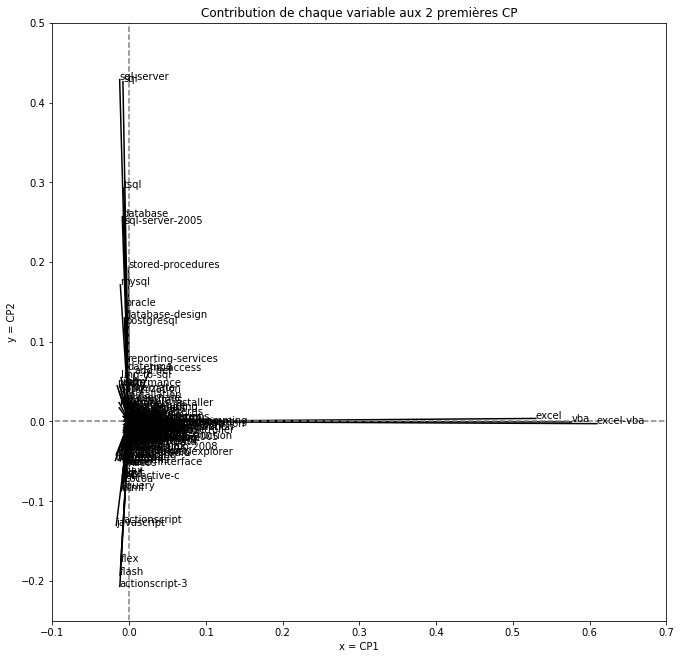

In [35]:
pcs2 = pca2.components_

fig = plt.figure(figsize=(11,11))
ax = plt.subplot()
ax.set_title('Contribution de chaque variable aux 2 premières CP')
plt.ylabel("y = CP2")
plt.xlabel("x = CP1")

for i , (x, y) in enumerate(zip(pcs2[0, :], pcs2[1, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, y_f_0.columns[i], fontsize='10')

# Afficher une ligne horizontale y=0
plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')
# Afficher une ligne verticale x=0
plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

plt.xlim([-0.1, 0.7])
plt.ylim([-0.25, 0.5])

<span style="color:#3366ff">  With this method, we can identify groups:      
<span style="color:#3366ff">  - excel, vba    
<span style="color:#3366ff">  - actionscript, javascript, flash,     
<span style="color:#3366ff">  - oracle, mysql, database, sql server      

### PCA sur y_f

In [36]:
# PCA preprocessing
data_tags_f_prepro = preprocessing.scale(y_f)

pca4 = decomposition.PCA(n_components=2)
pca4.fit(data_tags_f_prepro)

print("Variance des 2 premieres composantes principales", 
      pca4.explained_variance_ratio_.cumsum())

Variance des 2 premieres composantes principales [0.00748306 0.01449854]


In [37]:
data_tags_f_prepro_trans = pca4.transform(data_tags_f_prepro)

# Cette base mesure
shape = data_tags_f_prepro_trans.shape

print("Le tableau des Composantes Principales contient",shape[0], 
      "textes décrits dans", shape[1], "CP.")

Le tableau des Composantes Principales contient 18075 textes décrits dans 2 CP.


(-0.4, 0.5)

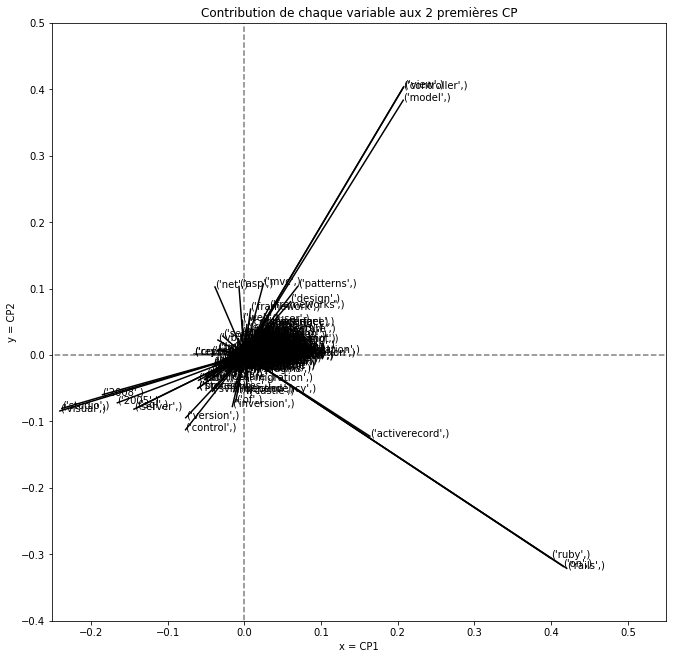

In [538]:
pcs4 = pca4.components_

fig = plt.figure(figsize=(11,11))
ax = plt.subplot()
ax.set_title('Contribution de chaque variable aux 2 premières CP')
plt.ylabel("y = CP2")
plt.xlabel("x = CP1")

for i , (x, y) in enumerate(zip(pcs4[0, :], pcs4[1, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, y_f.columns[i], fontsize='10')

# Afficher une ligne horizontale y=0
plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')
# Afficher une ligne verticale x=0
plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

plt.xlim([-0.25, 0.55])
plt.ylim([-0.4, 0.5])

<span style="color:#3366ff"> it 's hard to see any tendancies.

## <span style="color:#6600cc"> "y Tags" TF IDF

In [39]:
tfidf2 = TfidfVectorizer(max_features = 400)
values_y_tfidf2 = tfidf2.fit_transform(data_text['Tags_OK'])

y_tfidf = pd.DataFrame(values_y_tfidf2.toarray(), columns = [tfidf2.get_feature_names()])
y_tfidf.head()

,2000,2003,2005,2007,2008,64bit,access,actionscript,active,activerecord,ado,agile,agnostic,air,ajax,algorithm,analysis,and,ant,apache,api,app,application,applications,architecture,arrays,asp,assemblies,assembly,asynchronous,attributes,audio,authentication,automated,automation,backup,bash,batch,binary,binding,bit,boost,browser,build,caching,cakephp,casting,castle,ce,chrome,class,classic,client,clr,cocoa,code,coding,coldfusion,collection,collections,com,command,comments,compact,comparison,compiler,components,concurrency,config,configuration,connection,console,construction,content,continuous,control,controller,controls,cookies,crash,cross,cruisecontrol,crystal,css,csv,custom,cvs,data,database,datagridview,dataset,date,datetime,debugging,delphi,dependency,deployment,design,designer,desktop,development,diff,directory,django,dll,dns,documentation,dom,drop,dynamic,eclipse,editor,ee,emacs,email,embedded,encoding,encryption,engine,entity,enums,environment,error,events,excel,exception,explorer,features,file,files,filesystems,firefox,flash,flex,floating,fonts,format,formatting,forms,framework,frameworks,ftp,full,function,functional,garbage,gcc,gdi,generation,generics,git,google,graph,graphics,handling,hardware,hash,hibernate,hosting,html,http,https,ide,iis,image,import,indexing,inheritance,injection,installation,installer,integration,interface,internationalization,internet,interop,inversion,io,ios,iphone,java,javascript,jquery,jsf,json,jsp,keyboard,lambda,language,languages,layout,leaks,licensing,line,linker,linq,linux,lisp,list,listview,localization,locking,logging,lucene,macos,makefile,management,manipulation,maps,math,maven,memory,menu,merge,methods,mfc,migration,mime,mobile,mocking,mod,model,monitoring,mono,moss,ms,msbuild,multithreading,mvc,mysql,namespaces,naming,nant,net,netbeans,network,networking,nhibernate,objective,of,office,on,oop,open,opengl,openid,operating,optimization,oracle,orm,outlook,parsing,passwords,path,patterns,pdf,performance,perl,permissions,php,platform,plugins,point,pointers,post,postgresql,powershell,preprocessor,printing,procedures,process,processing,profiling,programming,project,projects,properties,proxy,python,qt,rails,random,refactoring,reference,reflection,regex,registry,reporting,reports,resharper,resources,rest,review,rewrite,routing,rss,ruby,schema,screen,scripting,scrum,search,security,serialization,server,service,services,servlets,session,sharepoint,shell,shortcuts,silverlight,smtp,soap,sockets,sorting,source,sourcesafe,spring,sql,sqlite,ssis,ssl,stack,statement,static,stl,stored,string,structures,studio,style,svn,swing,synchronization,syntax,sysadmin,system,tcp,tdd,templates,testing,tests,text,tfs,theory,time,to,tomcat,tortoisesvn,touch,tracking,transactions,tree,tsql,type,types,ubuntu,unicode,unit,unix,upload,url,user,utf,validation,variables,vb,vb6,vba,vbscript,version,versioning,video,view,vim,virtual,virtualization,vista,visual,vmware,wcf,web,webforms,webserver,winapi,windows,winforms,word,workflow,wpf,xaml,xcode,xhtml,xml,xp,xpath,xsd,xslt
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.59592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [40]:
y_tfidf.shape

(18075, 400)

In [41]:
values_y_tfidf2.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [42]:
y_tfidf.tail()

,2000,2003,2005,2007,2008,64bit,access,actionscript,active,activerecord,ado,agile,agnostic,air,ajax,algorithm,analysis,and,ant,apache,api,app,application,applications,architecture,arrays,asp,assemblies,assembly,asynchronous,attributes,audio,authentication,automated,automation,backup,bash,batch,binary,binding,bit,boost,browser,build,caching,cakephp,casting,castle,ce,chrome,class,classic,client,clr,cocoa,code,coding,coldfusion,collection,collections,com,command,comments,compact,comparison,compiler,components,concurrency,config,configuration,connection,console,construction,content,continuous,control,controller,controls,cookies,crash,cross,cruisecontrol,crystal,css,csv,custom,cvs,data,database,datagridview,dataset,date,datetime,debugging,delphi,dependency,deployment,design,designer,desktop,development,diff,directory,django,dll,dns,documentation,dom,drop,dynamic,eclipse,editor,ee,emacs,email,embedded,encoding,encryption,engine,entity,enums,environment,error,events,excel,exception,explorer,features,file,files,filesystems,firefox,flash,flex,floating,fonts,format,formatting,forms,framework,frameworks,ftp,full,function,functional,garbage,gcc,gdi,generation,generics,git,google,graph,graphics,handling,hardware,hash,hibernate,hosting,html,http,https,ide,iis,image,import,indexing,inheritance,injection,installation,installer,integration,interface,internationalization,internet,interop,inversion,io,ios,iphone,java,javascript,jquery,jsf,json,jsp,keyboard,lambda,language,languages,layout,leaks,licensing,line,linker,linq,linux,lisp,list,listview,localization,locking,logging,lucene,macos,makefile,management,manipulation,maps,math,maven,memory,menu,merge,methods,mfc,migration,mime,mobile,mocking,mod,model,monitoring,mono,moss,ms,msbuild,multithreading,mvc,mysql,namespaces,naming,nant,net,netbeans,network,networking,nhibernate,objective,of,office,on,oop,open,opengl,openid,operating,optimization,oracle,orm,outlook,parsing,passwords,path,patterns,pdf,performance,perl,permissions,php,platform,plugins,point,pointers,post,postgresql,powershell,preprocessor,printing,procedures,process,processing,profiling,programming,project,projects,properties,proxy,python,qt,rails,random,refactoring,reference,reflection,regex,registry,reporting,reports,resharper,resources,rest,review,rewrite,routing,rss,ruby,schema,screen,scripting,scrum,search,security,serialization,server,service,services,servlets,session,sharepoint,shell,shortcuts,silverlight,smtp,soap,sockets,sorting,source,sourcesafe,spring,sql,sqlite,ssis,ssl,stack,statement,static,stl,stored,string,structures,studio,style,svn,swing,synchronization,syntax,sysadmin,system,tcp,tdd,templates,testing,tests,text,tfs,theory,time,to,tomcat,tortoisesvn,touch,tracking,transactions,tree,tsql,type,types,ubuntu,unicode,unit,unix,upload,url,user,utf,validation,variables,vb,vb6,vba,vbscript,version,versioning,video,view,vim,virtual,virtualization,vista,visual,vmware,wcf,web,webforms,webserver,winapi,windows,winforms,word,workflow,wpf,xaml,xcode,xhtml,xml,xp,xpath,xsd,xslt
18070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.569071,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.594827,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.567748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

<span style="color:#3366ff"> y_tfidf = Term Frequency-Inverse Document Frequency applied to "Tags" 

In [43]:
y_tfidf.columns.levels

FrozenList([['2000', '2003', '2005', '2007', '2008', '64bit', 'access', 'actionscript', 'active', 'activerecord', 'ado', 'agile', 'agnostic', 'air', 'ajax', 'algorithm', 'analysis', 'and', 'ant', 'apache', 'api', 'app', 'application', 'applications', 'architecture', 'arrays', 'asp', 'assemblies', 'assembly', 'asynchronous', 'attributes', 'audio', 'authentication', 'automated', 'automation', 'backup', 'bash', 'batch', 'binary', 'binding', 'bit', 'boost', 'browser', 'build', 'caching', 'cakephp', 'casting', 'castle', 'ce', 'chrome', 'class', 'classic', 'client', 'clr', 'cocoa', 'code', 'coding', 'coldfusion', 'collection', 'collections', 'com', 'command', 'comments', 'compact', 'comparison', 'compiler', 'components', 'concurrency', 'config', 'configuration', 'connection', 'console', 'construction', 'content', 'continuous', 'control', 'controller', 'controls', 'cookies', 'crash', 'cross', 'cruisecontrol', 'crystal', 'css', 'csv', 'custom', 'cvs', 'data', 'database', 'datagridview', 'datas

### PCA sur y_tfidf

In [44]:
# PCA preprocessing
data_tags_tfidf_prepro = preprocessing.scale(y_tfidf)

pca3 = decomposition.PCA(n_components=2)
pca3.fit(data_tags_tfidf_prepro)

print("Variance des 2 premieres composantes principales", 
      pca3.explained_variance_ratio_.cumsum())

Variance des 2 premieres composantes principales [0.00663992 0.01299104]


In [45]:
data_tags_tfidf_prepro_trans = pca3.transform(data_tags_tfidf_prepro)

# Cette base mesure
shape = data_tags_tfidf_prepro_trans.shape

print("Le tableau des Composantes Principales contient",shape[0], 
      "textes décrits dans", shape[1], "CP.")

Le tableau des Composantes Principales contient 18075 textes décrits dans 2 CP.


(-0.3, 0.6)

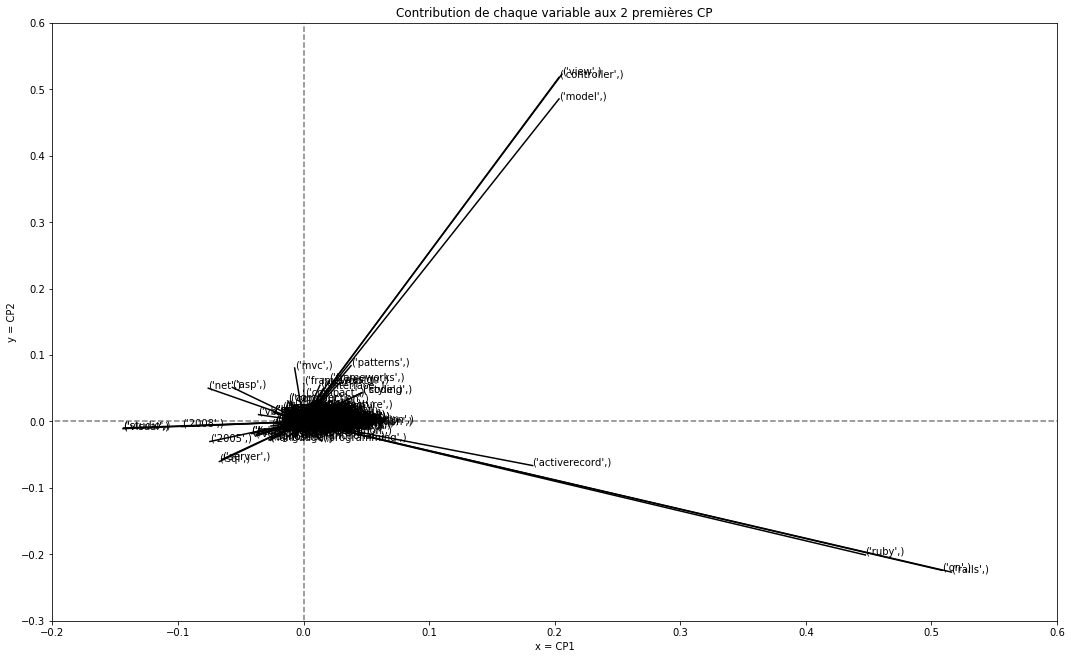

In [46]:
pcs3 = pca3.components_

fig = plt.figure(figsize=(18,11))
ax = plt.subplot()
ax.set_title('Contribution de chaque variable aux 2 premières CP')
plt.ylabel("y = CP2")
plt.xlabel("x = CP1")

for i , (x, y) in enumerate(zip(pcs3[0, :], pcs3[1, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, y_tfidf.columns[i], fontsize='10')

# Afficher une ligne horizontale y=0
plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')
# Afficher une ligne verticale x=0
plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

plt.xlim([-0.2, 0.6])
plt.ylim([-0.3, 0.6])

<span style="color:#3366ff"> it 's hard to see any tendancies.

# <span style="color:#6600cc"> X Clustering

## 1) Clustering to determine "X clusters" based on "text" Frequency

### X Freq preprocessing

In [47]:
scaler_tags_x_f = preprocessing.StandardScaler().fit(X_f)
X_f_scaled = scaler_tags_x_f.transform(X_f) 

<strong> k-mean on "X text" Frequency

In [48]:
calinski = []
silhouettes = [] 

for num_cluster in range(10,200, 10):
    cls_kmean = cluster.KMeans(num_cluster, 
                        n_init=1, 
                        init='random')
    cls_kmean.fit(X_f_scaled)    
    cali = metrics.calinski_harabaz_score(X_f_scaled, cls_kmean.labels_)
    calinski.append(cali)
    silh = metrics.silhouette_score(X_f_scaled, cls_kmean.labels_)
    silhouettes.append(silh)

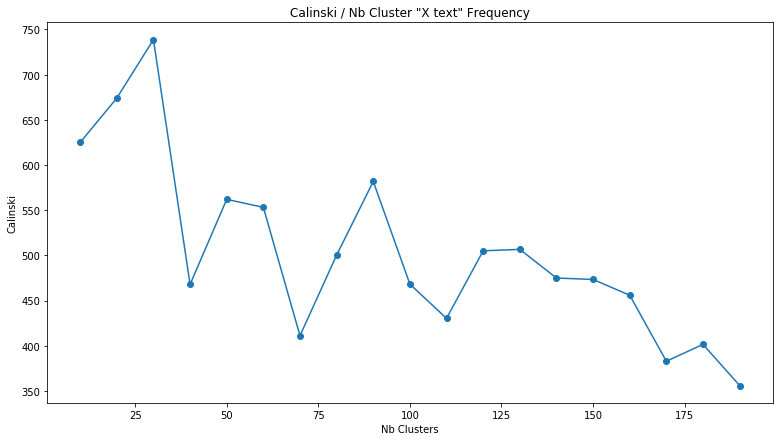

In [49]:
plt.figure(figsize=(13,7))

plt.title('Calinski / Nb Cluster "X text" Frequency')
plt.ylabel("Calinski")
plt.xlabel("Nb Clusters")

plt.plot(range(10,200, 10), calinski, marker='o')

In [50]:
test = max(calinski)
test

738.7967091402983

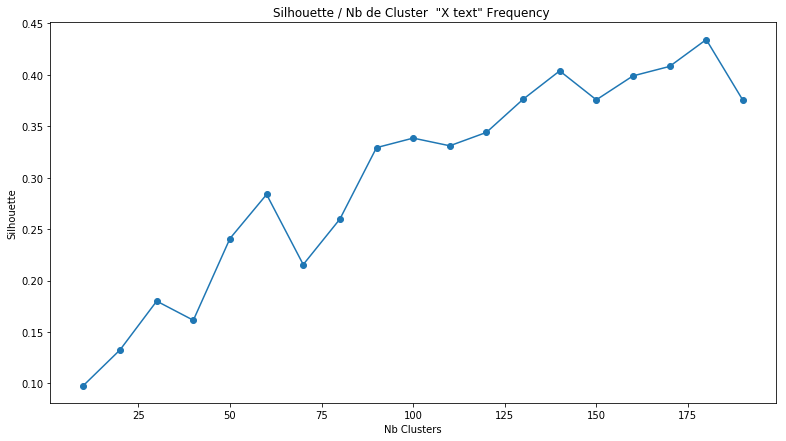

In [51]:
plt.figure(figsize=(13,7))

plt.title('Silhouette / Nb de Cluster  "X text" Frequency ')
plt.ylabel("Silhouette")
plt.xlabel("Nb Clusters")

plt.plot(range(10,200, 10), silhouettes, marker='o')

In [52]:
test = max(silhouettes)
test

0.4343394706355886

<span style="color:#3366ff"> --> NOK

<strong> CAH on "text" Frequency

In [53]:
calinski = []
silhouettes = [] 

for num_cluster in range(10,200, 10):
    cls_cah = cluster.AgglomerativeClustering(n_clusters=num_cluster, 
                                affinity='euclidean', 
                                memory=None, 
                                connectivity=None, 
                                compute_full_tree='auto', 
                                linkage='ward' 
                                )
    cls_cah.fit(X_f_scaled)
    cali = metrics.calinski_harabaz_score(X_f_scaled, cls_cah.labels_)
    calinski.append(cali)
    silh = metrics.silhouette_score(X_f_scaled, cls_cah.labels_)
    silhouettes.append(silh)    

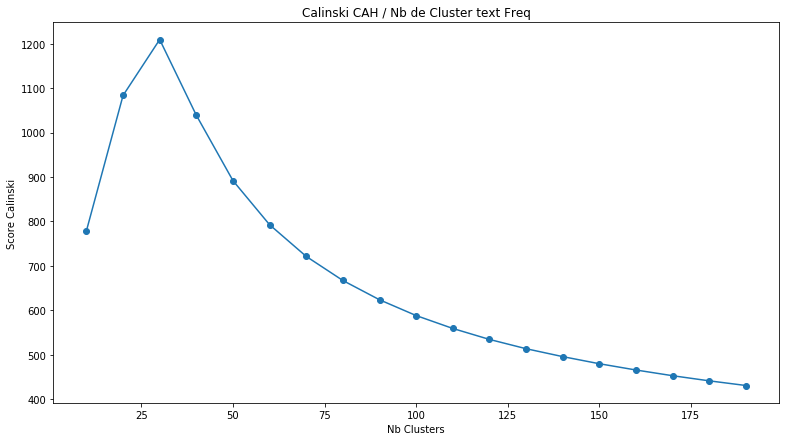

In [54]:
plt.figure(figsize=(13,7))

plt.title('Calinski CAH / Nb de Cluster text Freq')
plt.ylabel("Score Calinski")
plt.xlabel("Nb Clusters")

plt.plot(range(10,200, 10), calinski, marker='o')

In [55]:
test = max(calinski)
test

1209.116624376899

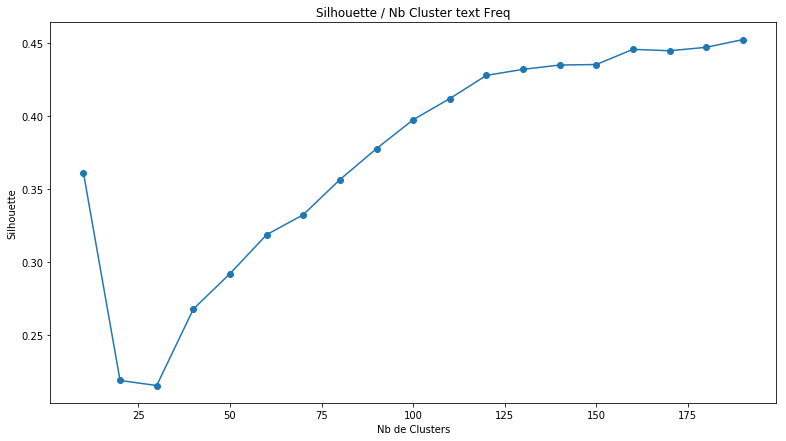

In [56]:
plt.figure(figsize=(13,7))

plt.title('Silhouette / Nb Cluster text Freq')
plt.ylabel("Silhouette")
plt.xlabel("Nb de Clusters")

plt.plot(range(10,200, 10), silhouettes, marker='o')

In [57]:
test = max(silhouettes)
test

0.4526033457843083

In [58]:
calinski = []
silhouettes = [] 

for num_cluster in range(10,50, 2):
    cls_cah = cluster.AgglomerativeClustering(n_clusters=num_cluster, 
                                affinity='euclidean', 
                                memory=None, 
                                connectivity=None, 
                                compute_full_tree='auto', 
                                linkage='ward' 
                                )
    cls_cah.fit(X_f_scaled)
    cali = metrics.calinski_harabaz_score(X_f_scaled, cls_cah.labels_)
    calinski.append(cali)
    silh = metrics.silhouette_score(X_f_scaled, cls_cah.labels_)
    silhouettes.append(silh)  

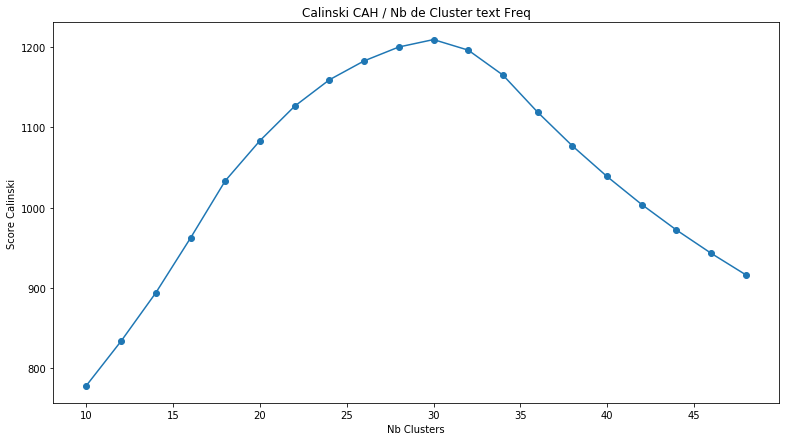

In [59]:
plt.figure(figsize=(13,7))

plt.title('Calinski CAH / Nb de Cluster text Freq')
plt.ylabel("Score Calinski")
plt.xlabel("Nb Clusters")

plt.plot(range(10,50, 2), calinski, marker='o')

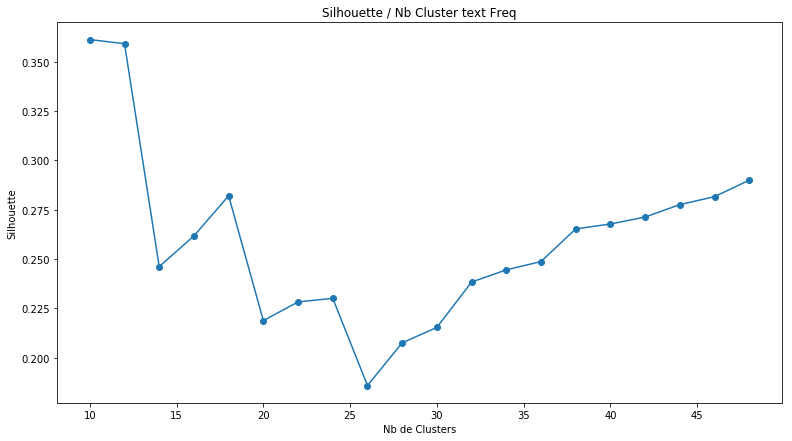

In [60]:
plt.figure(figsize=(13,7))

plt.title('Silhouette / Nb Cluster text Freq')
plt.ylabel("Silhouette")
plt.xlabel("Nb de Clusters")

plt.plot(range(10,50, 2), silhouettes, marker='o')

<span style="color:#3366ff"> --> 20 ou 30 ?

### Best Clustering X freq

In [61]:
cls_cah_X_f = cluster.AgglomerativeClustering(n_clusters=34, 
                                affinity='euclidean', 
                                memory=None, 
                                connectivity=None, 
                                compute_full_tree='auto', 
                                linkage='ward' 
                                )

In [62]:
cls_cah_X_f.fit(X_f_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=34,
            pooling_func=<function mean at 0x7f8fe01c6ae8>)

In [63]:
X_f_clus_cah = cls_cah_X_f.labels_
X_f_clus_cah

array([32,  8,  1, ..., 10,  5, 11])

In [64]:
data_text['X Freq Cluster'] = X_f_clus_cah
data_text.head()

,Text_OK,Tags_OK,X Freq Cluster
0,want use track bar change form opacity code de...,c# floating-point type-conversion double ...,32
1,use,html css css3 internet-explorer-7,8
2,value,c# datetime time datediff relative-time-s...,1
3,net,.net math,14
4,work,c# linq web-services .net-3.5,12


## 2) Clustering to determine "X clusters" based on "text" TFIDF

### X TFIDF preprocessing

In [65]:
scaler_tags_x_tfidf = preprocessing.StandardScaler().fit(X_tfidf)
X_tfidf_scaled = scaler_tags_x_tfidf.transform(X_tfidf) 

<strong> k-mean on "X text" TFIDF

In [66]:
calinski = []
silhouettes = [] 

for num_cluster in range(10,200, 10):
    cls_kmean = cluster.KMeans(num_cluster, 
                        n_init=1, 
                        init='random')
    cls_kmean.fit(X_tfidf_scaled)    
    cali = metrics.calinski_harabaz_score(X_tfidf_scaled, cls_kmean.labels_)
    calinski.append(cali)
    silh = metrics.silhouette_score(X_tfidf_scaled, cls_kmean.labels_)
    silhouettes.append(silh)

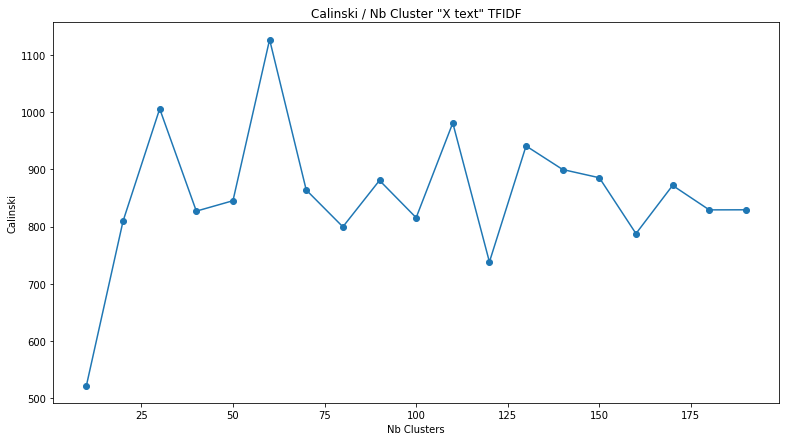

In [67]:
plt.figure(figsize=(13,7))

plt.title('Calinski / Nb Cluster "X text" TFIDF')
plt.ylabel("Calinski")
plt.xlabel("Nb Clusters")

plt.plot(range(10,200, 10), calinski, marker='o')

In [68]:
test = max(calinski)
test

1126.6089328200537

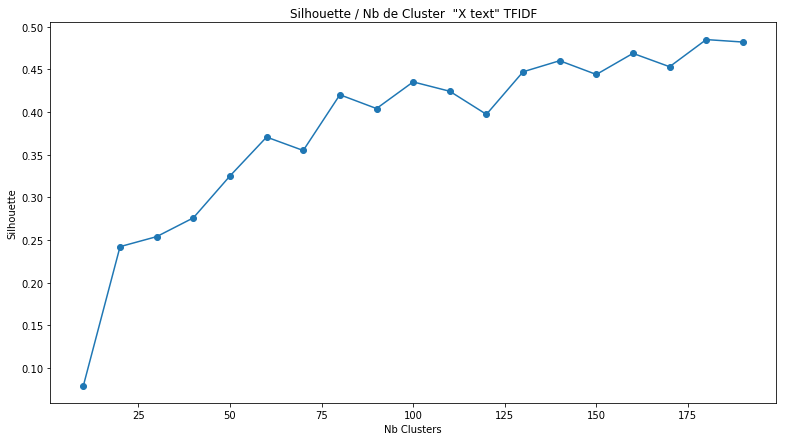

In [69]:
plt.figure(figsize=(13,7))

plt.title('Silhouette / Nb de Cluster  "X text" TFIDF')
plt.ylabel("Silhouette")
plt.xlabel("Nb Clusters")

plt.plot(range(10,200, 10), silhouettes, marker='o')

In [70]:
test = max(silhouettes)
test

0.4849972504194363

<strong> CAH on "text" TFIDF

In [71]:
calinski = []
silhouettes = [] 

for num_cluster in range(10,200, 10):
    cls_cah = cluster.AgglomerativeClustering(n_clusters=num_cluster, 
                                affinity='euclidean', 
                                memory=None, 
                                connectivity=None, 
                                compute_full_tree='auto', 
                                linkage='ward' 
                                )
    cls_cah.fit(X_tfidf_scaled)
    cali = metrics.calinski_harabaz_score(X_tfidf_scaled, cls_cah.labels_)
    calinski.append(cali)
    silh = metrics.silhouette_score(X_tfidf_scaled, cls_cah.labels_)
    silhouettes.append(silh)   

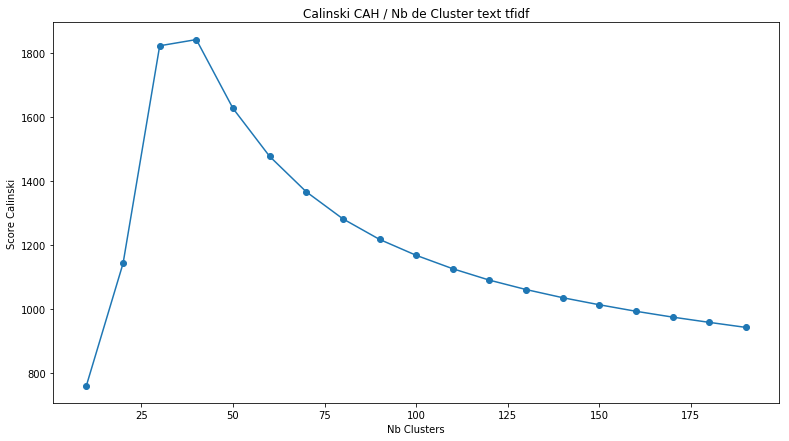

In [72]:
plt.figure(figsize=(13,7))

plt.title('Calinski CAH / Nb de Cluster text tfidf')
plt.ylabel("Score Calinski")
plt.xlabel("Nb Clusters")

plt.plot(range(10,200, 10), calinski, marker='o')

In [73]:
test = max(calinski)
test

1841.8455110410957

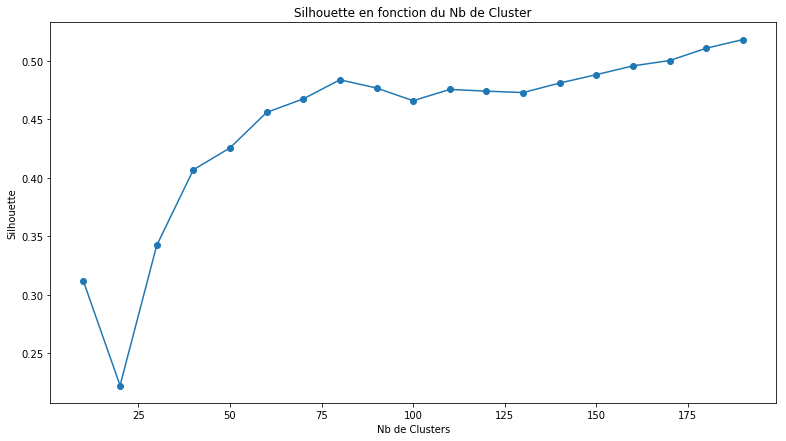

In [74]:
plt.figure(figsize=(13,7))

plt.title('Silhouette en fonction du Nb de Cluster')
plt.ylabel("Silhouette")
plt.xlabel("Nb de Clusters")

plt.plot(range(10,200, 10), silhouettes, marker='o')

In [75]:
test = max(silhouettes)
test

0.518080374207061

In [76]:
calinski = []
silhouettes = [] 

for num_cluster in range(20,50, 2):
    cls_cah = cluster.AgglomerativeClustering(n_clusters=num_cluster, 
                                affinity='euclidean', 
                                memory=None, 
                                connectivity=None, 
                                compute_full_tree='auto', 
                                linkage='ward' 
                                )
    cls_cah.fit(X_tfidf_scaled)
    cali = metrics.calinski_harabaz_score(X_tfidf_scaled, cls_cah.labels_)
    calinski.append(cali)
    silh = metrics.silhouette_score(X_tfidf_scaled, cls_cah.labels_)
    silhouettes.append(silh)   

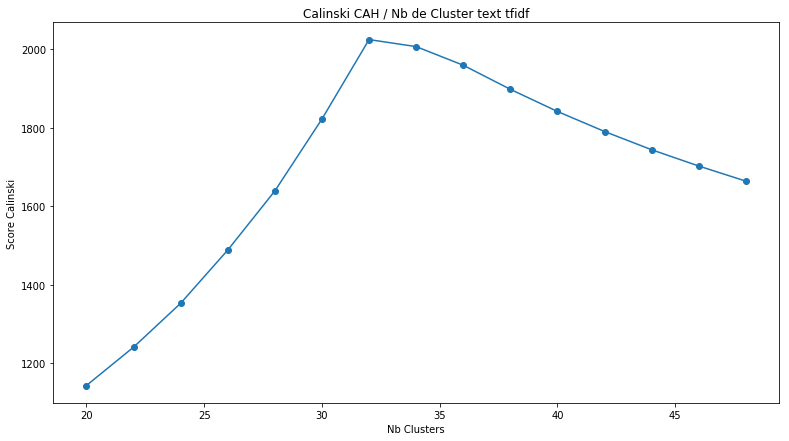

In [77]:
plt.figure(figsize=(13,7))

plt.title('Calinski CAH / Nb de Cluster text tfidf')
plt.ylabel("Score Calinski")
plt.xlabel("Nb Clusters")

plt.plot(range(20,50,2), calinski, marker='o')

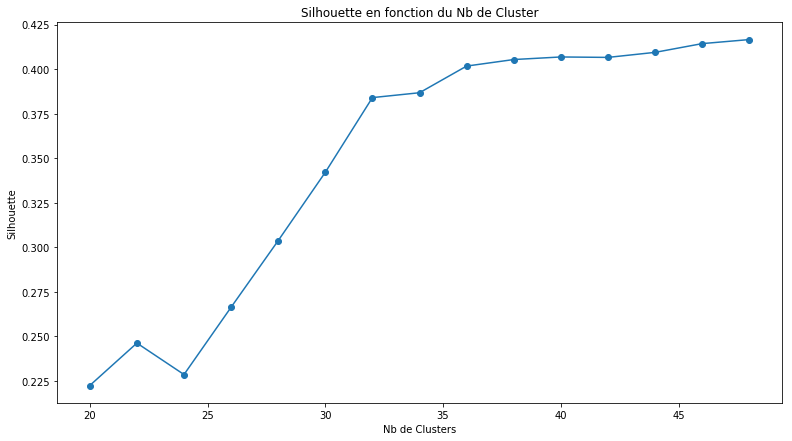

In [78]:
plt.figure(figsize=(13,7))

plt.title('Silhouette en fonction du Nb de Cluster')
plt.ylabel("Silhouette")
plt.xlabel("Nb de Clusters")

plt.plot(range(20,50,2), silhouettes, marker='o')

<span style="color:#3366ff"> --> Best 32

### Best Clustering X text TFIDF

In [79]:
cls_cah_X_tfidf = cluster.AgglomerativeClustering(n_clusters=32, 
                                affinity='euclidean', 
                                memory=None, 
                                connectivity=None, 
                                compute_full_tree='auto', 
                                linkage='ward' 
                                )

cls_cah_X_tfidf.fit(X_tfidf_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=32,
            pooling_func=<function mean at 0x7f8fe01c6ae8>)

In [80]:
X_tfidf_clus_cah = cls_cah_X_tfidf.labels_
X_tfidf_clus_cah

array([ 0,  4, 12, ...,  2,  1, 13])

In [81]:
data_text['X TFIDF Cluster'] = X_tfidf_clus_cah
data_text.head()

,Text_OK,Tags_OK,X Freq Cluster,X TFIDF Cluster
0,want use track bar change form opacity code de...,c# floating-point type-conversion double ...,32,0
1,use,html css css3 internet-explorer-7,8,4
2,value,c# datetime time datediff relative-time-s...,1,12
3,net,.net math,14,14
4,work,c# linq web-services .net-3.5,12,26


# <span style="color:#6600cc"> y Clustering

## 1) Clustering to determine "y clusters" based on "tags" Frequency

### y Freq preprocessing

In [82]:
scaler_tags = preprocessing.StandardScaler().fit(y_f)
y_scaled = scaler_tags.transform(y_f) 

scaler_tags0 = preprocessing.StandardScaler().fit(y_f_0)
y_f0_scaled = scaler_tags0.transform(y_f_0) 

<strong> k-mean on "y Tags" Frequency

In [83]:
calinski = []
silhouettes = [] 

for num_cluster in range(10,200, 10):
    cls_kmean = cluster.KMeans(num_cluster, 
                        n_init=1, 
                        init='random')
    cls_kmean.fit(y_scaled)    
    cali = metrics.calinski_harabaz_score(y_scaled, cls_kmean.labels_)
    calinski.append(cali)
    silh = metrics.silhouette_score(y_scaled, cls_kmean.labels_)
    silhouettes.append(silh)

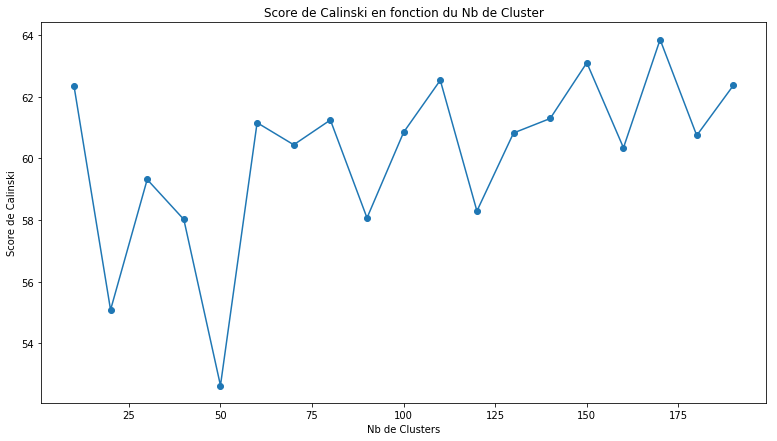

In [84]:
plt.figure(figsize=(13,7))

plt.title('Score de Calinski en fonction du Nb de Cluster')
plt.ylabel("Score de Calinski")
plt.xlabel("Nb de Clusters")

plt.plot(range(10,200, 10), calinski, marker='o')

In [85]:
test = max(calinski)
test

63.84971072301335

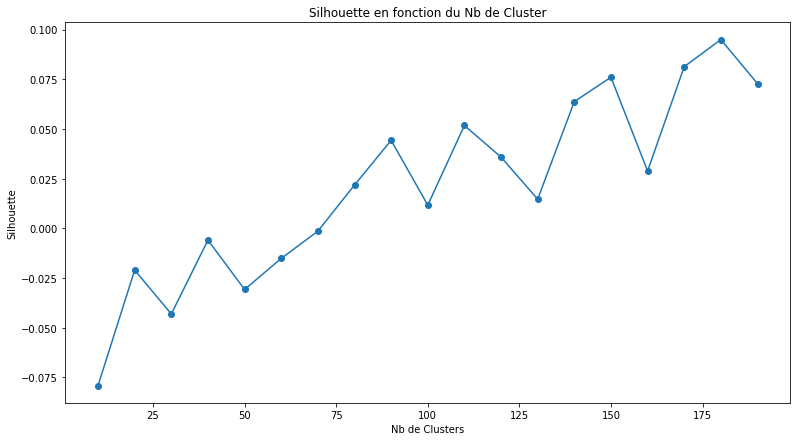

In [86]:
plt.figure(figsize=(13,7))

plt.title('Silhouette en fonction du Nb de Cluster')
plt.ylabel("Silhouette")
plt.xlabel("Nb de Clusters")

plt.plot(range(10,200, 10), silhouettes, marker='o')

In [87]:
test = max(silhouettes)
test

0.09493813748957428

<span style="color:#3366ff"> --> NOK

<strong> CAH on "tags" Frequency

In [88]:
calinski = []
silhouettes = [] 

for num_cluster in range(10,200, 10):
    cls_cah = cluster.AgglomerativeClustering(n_clusters=num_cluster, 
                                affinity='euclidean', 
                                memory=None, 
                                connectivity=None, 
                                compute_full_tree='auto', 
                                linkage='ward' 
                                )
    cls_cah.fit(y_scaled)
    cali = metrics.calinski_harabaz_score(y_scaled, cls_cah.labels_)
    calinski.append(cali)
    silh = metrics.silhouette_score(y_scaled, cls_cah.labels_)
    silhouettes.append(silh)    

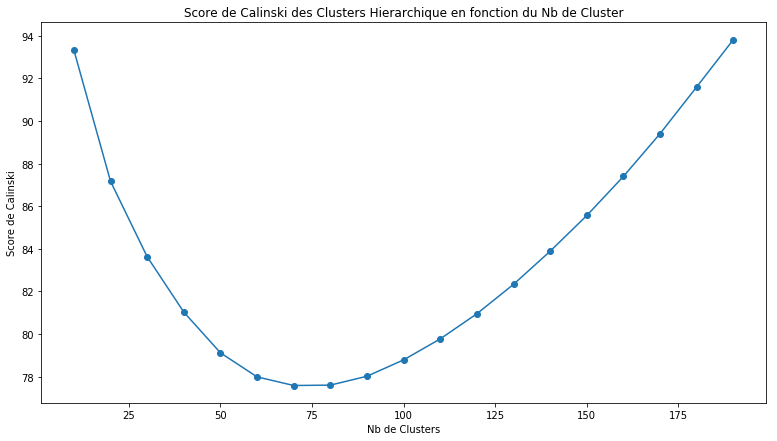

In [89]:
plt.figure(figsize=(13,7))

plt.title('Score de Calinski des Clusters Hierarchique en fonction du Nb de Cluster')
plt.ylabel("Score de Calinski")
plt.xlabel("Nb de Clusters")

plt.plot(range(10,200, 10), calinski, marker='o')

In [90]:
test = max(calinski)
test

93.82660282404913

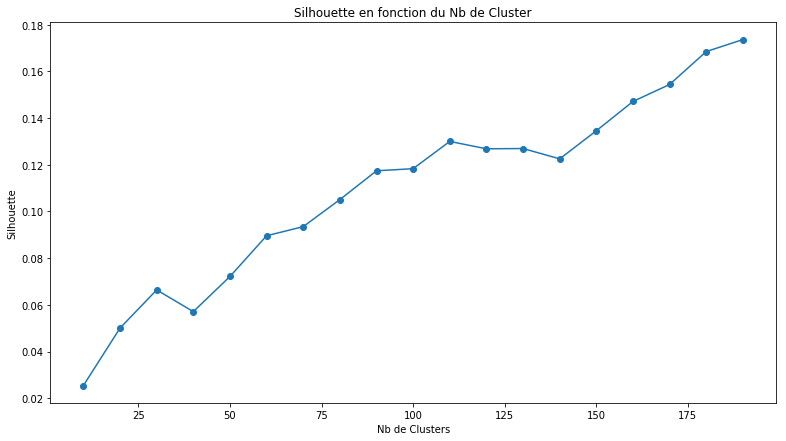

In [91]:
plt.figure(figsize=(13,7))

plt.title('Silhouette en fonction du Nb de Cluster')
plt.ylabel("Silhouette")
plt.xlabel("Nb de Clusters")

plt.plot(range(10,200, 10), silhouettes, marker='o')

In [92]:
test = max(silhouettes)
test

0.1736275615547914

<span style="color:#3366ff"> OK 

### Best Clustering y freq

In [93]:
cls_cah_ok = cluster.AgglomerativeClustering(n_clusters=190, 
                                affinity='euclidean', 
                                memory=None, 
                                connectivity=None, 
                                compute_full_tree='auto', 
                                linkage='ward' )
cls_cah_ok.fit(y_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=190,
            pooling_func=<function mean at 0x7f8fe01c6ae8>)

In [94]:
y_f_clus_cah = cls_cah_ok.labels_
y_f_clus_cah

array([143,  42,  45, ...,  35,  42,  12])

<span style="color:#3366ff">

In [95]:
y_f_clus_cah.shape

(18075,)

In [96]:
data_text['y Freq Cluster'] = y_f_clus_cah
data_text.head()

,Text_OK,Tags_OK,X Freq Cluster,X TFIDF Cluster,y Freq Cluster
0,want use track bar change form opacity code de...,c# floating-point type-conversion double ...,32,0,143
1,use,html css css3 internet-explorer-7,8,4,42
2,value,c# datetime time datediff relative-time-s...,1,12,45
3,net,.net math,14,14,1
4,work,c# linq web-services .net-3.5,12,26,2


## 2) Clustering to determine "y clusters" based on "Tags" TF-IDF

### y TF-IDF preprocessing

In [97]:
scaler_tags2 = preprocessing.StandardScaler().fit(y_tfidf)
y_tfidf_scaled = scaler_tags2.transform(y_tfidf) 

<strong> k-mean on "Tags" TF-IDF

In [98]:
calinski = []
silhouettes = [] 

for num_cluster in range(10,200, 10):
    cls_kmean = cluster.KMeans(num_cluster, 
                        n_init=1, 
                        init='random')
    cls_kmean.fit(y_tfidf_scaled)      
    cali = metrics.calinski_harabaz_score(y_tfidf_scaled, cls_kmean.labels_)
    calinski.append(cali)
    silh = metrics.silhouette_score(y_tfidf_scaled, cls_kmean.labels_)
    silhouettes.append(silh)

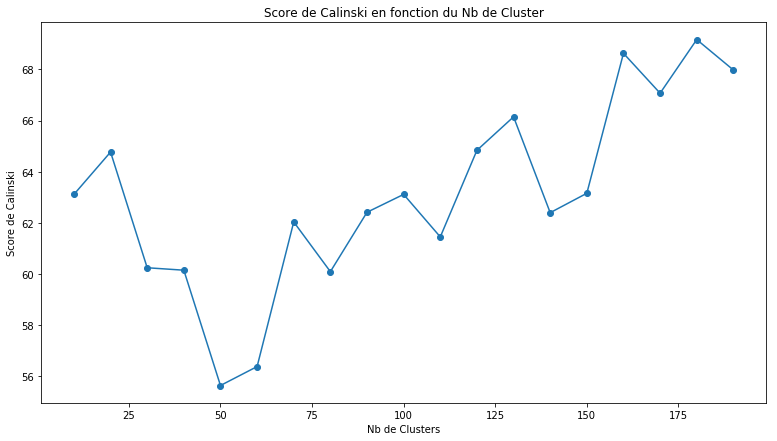

In [99]:
plt.figure(figsize=(13,7))

plt.title('Score de Calinski en fonction du Nb de Cluster')
plt.ylabel("Score de Calinski")
plt.xlabel("Nb de Clusters")

plt.plot(range(10,200, 10), calinski, marker='o')

In [100]:
test = max(calinski)
test

69.17111595268575

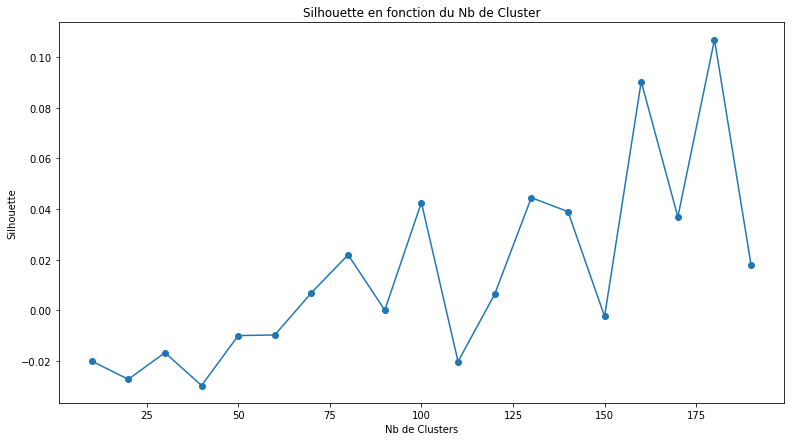

In [101]:
plt.figure(figsize=(13,7))

plt.title('Silhouette en fonction du Nb de Cluster')
plt.ylabel("Silhouette")
plt.xlabel("Nb de Clusters")

plt.plot(range(10,200, 10), silhouettes, marker='o')

In [102]:
test = max(silhouettes)
test

0.10704057109306571

<span style="color:#3366ff"> -> NOK

<strong> CAH on "Tags" TF-IDF

In [103]:
calinski = []
silhouettes = [] 

for num_cluster in range(10,200, 10):
    cls_cah = cluster.AgglomerativeClustering(n_clusters=num_cluster, 
                                affinity='euclidean', 
                                memory=None, 
                                connectivity=None, 
                                compute_full_tree='auto', 
                                linkage='ward' 
                                )
    cls_cah.fit(y_tfidf_scaled)
    cali = metrics.calinski_harabaz_score(y_tfidf_scaled, cls_cah.labels_)
    calinski.append(cali)
    silh = metrics.silhouette_score(y_tfidf_scaled, cls_cah.labels_)
    silhouettes.append(silh)   

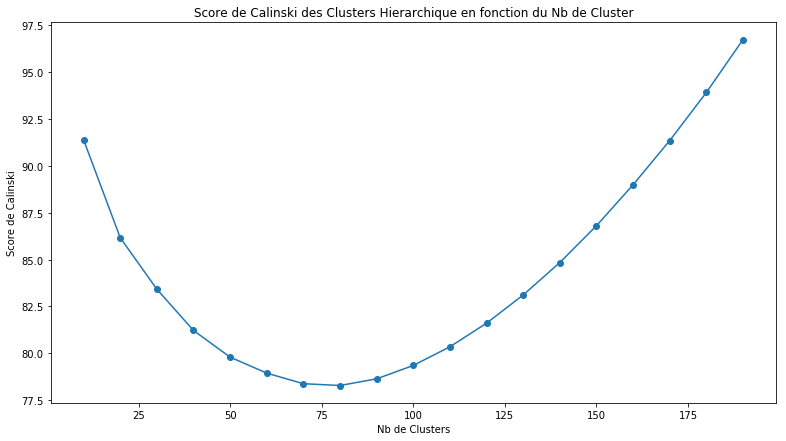

In [104]:
plt.figure(figsize=(13,7))

plt.title('Score de Calinski des Clusters Hierarchique en fonction du Nb de Cluster')
plt.ylabel("Score de Calinski")
plt.xlabel("Nb de Clusters")

plt.plot(range(10,200, 10), calinski, marker='o')

In [105]:
test = max(calinski)
test

96.73583597665522

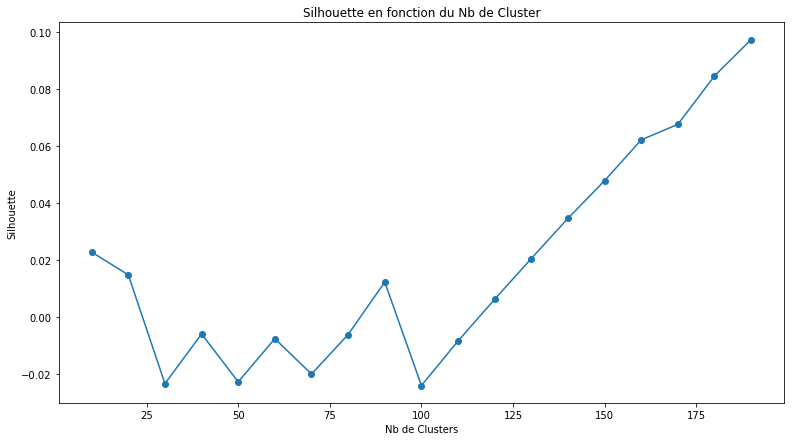

In [106]:
plt.figure(figsize=(13,7))

plt.title('Silhouette en fonction du Nb de Cluster')
plt.ylabel("Silhouette")
plt.xlabel("Nb de Clusters")

plt.plot(range(10,200, 10), silhouettes, marker='o')

In [107]:
test = max(silhouettes)
test

0.09745055338173404

### Best Clustering y tfidf

In [108]:
cls_cah_ok2 = cluster.AgglomerativeClustering(n_clusters=10, 
                                affinity='euclidean', 
                                memory=None, 
                                connectivity=None, 
                                compute_full_tree='auto', 
                                linkage='ward' 
                                )

cls_cah_ok2.fit(y_tfidf_scaled)

y_tfidf_clus_cah = cls_cah_ok2.labels_
y_tfidf_clus_cah

array([1, 7, 0, ..., 0, 7, 0])

In [109]:
test = pd.DataFrame(y_tfidf_clus_cah)
test.describe()

,0
count,18075.000000
mean,0.164094
std,0.937557
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,9.000000


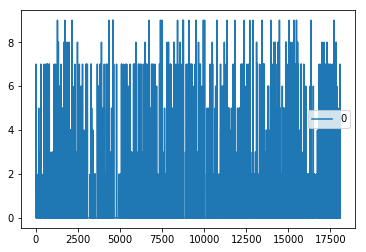

In [110]:
test.plot()

In [111]:
data_text['y tfidf Cluster'] = y_tfidf_clus_cah
data_text.head()

,Text_OK,Tags_OK,X Freq Cluster,X TFIDF Cluster,y Freq Cluster,y tfidf Cluster
0,want use track bar change form opacity code de...,c# floating-point type-conversion double ...,32,0,143,1
1,use,html css css3 internet-explorer-7,8,4,42,7
2,value,c# datetime time datediff relative-time-s...,1,12,45,0
3,net,.net math,14,14,1,0
4,work,c# linq web-services .net-3.5,12,26,2,0


<strong> ALT = test with an other value

In [112]:
cls_cah_ok3 = cluster.AgglomerativeClustering(n_clusters=190, 
                                affinity='euclidean', 
                                memory=None, 
                                connectivity=None, 
                                compute_full_tree='auto', 
                                linkage='ward' 
                                )

cls_cah_ok3.fit(y_tfidf_scaled)

y_tfidf_clus_cah_alt = cls_cah_ok3.labels_
y_tfidf_clus_cah_alt

array([65, 63, 34, ...,  3, 63,  2])

In [113]:
data_text['y tfidf Cluster alt'] = y_tfidf_clus_cah_alt
data_text.head()

,Text_OK,Tags_OK,X Freq Cluster,X TFIDF Cluster,y Freq Cluster,y tfidf Cluster,y tfidf Cluster alt
0,want use track bar change form opacity code de...,c# floating-point type-conversion double ...,32,0,143,1,65
1,use,html css css3 internet-explorer-7,8,4,42,7,63
2,value,c# datetime time datediff relative-time-s...,1,12,45,0,34
3,net,.net math,14,14,1,0,19
4,work,c# linq web-services .net-3.5,12,26,2,0,7


## Clustering Synthesis

<span><table class="wikitable">
<tr>
<th>Clustering</th>
<th>Calinski</th>
<th>Parameters</th>    
<th>Interest</th>
</tr>
<tr>
<td>kmeans + X Freq</td>
<td>738</td>
<td>n = 30</td>
<td>-</td>
</tr>
<tr>
<td>kmeans + X tfidf </td>
<td>1126</td>
<td>n = 60</td>    
<td>+</td>
</tr>
<tr>
<td>kmeans + y Freq</td>
<td>63</td>
<td>n = 10</td>
<td>-</td>
</tr>
<tr>
<td>kmeans + y tfidf </td>
<td>69.17</td>
<td>n = 1900</td>    
<td>-</td>
</tr>
<tr>
<td>CAH + X Freq</td>
<td>1209</td>
<td>n = 34</td>
<td>++</td>
</tr>
<tr>
<td>CAH + X tfidf</td>
<td>2053</td>
<td>n =  34</td>
<td>++</td>
</tr>
<tr>
<td>CAH + y Freq</td>
<td>93.8</td>
<td>n = 10 ou 190</td>
<td>+</td>
</tr>
<tr>
<td>CAH + y tfidf</td>
<td>96.7</td>
<td>n = 10 ou 190</td>
<td>++</td>
</tr>
</table>

<span style="color:#3366ff"> CAH best clustering

In [114]:
data_text_engine_FULL = data_text.filter(items=(['Text_OK',
                                                 'Tags_OK',
                                                 'y Freq Cluster',
                                                 'y tfidf Cluster',
                                                 'y tfidf Cluster alt']))

data_text_engine_FULL.to_csv(path_or_buf='DATA_clean/20180918_data_OK_5000_double_Clus.csv',
                             index=True)

# <span style="color:#6600cc"> MACHINE LEARNING - - - - - - - - - - - - - - - - - 

### Preprocessing

<strong> X Freq

In [115]:
scaler_text = preprocessing.StandardScaler().fit(X_f)
X_f_scaled = scaler_text.transform(X_f) 
X_f_scaled.shape

(18075, 32)

<strong> X tfidf

In [116]:
scaler_text = preprocessing.StandardScaler().fit(X_tfidf)
X_tfidf_scaled = scaler_text.transform(X_tfidf) 
X_tfidf_scaled.shape

(18075, 32)

<strong> Clusters X Freq

Best clustering

In [117]:
X_f_rav = X_f_clus_cah.ravel()
X_f_rav

array([32,  8,  1, ..., 10,  5, 11])

<strong> Clusters X tfidf

Best clustering

In [118]:
X_tfidf_rav = X_tfidf_clus_cah.ravel()
X_tfidf_rav

array([ 0,  4, 12, ...,  2,  1, 13])

<strong> y clusters on Freq

Best clustering

In [119]:
y_rav = y_f_clus_cah.ravel()
y_rav

array([143,  42,  45, ...,  35,  42,  12])

<strong> y clusters on TF-IDF

Best clustering

In [120]:
y_tfidf_rav = y_tfidf_clus_cah.ravel()
y_tfidf_rav

array([1, 7, 0, ..., 0, 7, 0])

test with y_tfidf_clus_cah_alt

In [121]:
y_tfidf_rav_alt = y_tfidf_clus_cah_alt.ravel()
y_tfidf_rav_alt

array([65, 63, 34, ...,  3, 63,  2])

# 1) SUPERVISED ML: Classifier kNN

## kNN: X_f & Cluster y_f

<strong> Add column of 1

In [122]:
xones = np.ones(X_f_scaled.shape[0])
xones = pd.DataFrame(xones)

X_f_scaled = pd.DataFrame(X_f_scaled)

X_f = pd.concat([xones, X_f_scaled], axis = 1)
X_f.head()

,0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,1.0,2.131379,6.842329,4.220016,3.716931,1.710785,3.389891,5.910532,15.812706,8.548559,3.156135,4.291225,3.118814,4.276715,-0.034909,7.803889,26.870058,2.004854,42.502941,8.657100,3.080653,8.602325,95.060507,54.877135,3.626881,3.177383,1.432363,1.297898,3.295487,6.330841,1.850016,2.220387,7.03483
1,1.0,-0.469180,-0.146149,-0.236966,-0.269039,-0.584527,-0.294995,-0.169189,-0.063240,-0.116979,-0.316843,-0.233034,-0.320635,-0.233824,-0.034909,-0.128141,-0.037216,-0.498789,-0.023528,-0.115512,-0.324606,-0.116248,-0.010520,-0.018223,-0.275719,-0.314724,1.432363,-0.770477,-0.303445,-0.157957,-0.540536,-0.450372,-0.14215
2,1.0,-0.469180,-0.146149,-0.236966,-0.269039,-0.584527,-0.294995,-0.169189,-0.063240,-0.116979,-0.316843,-0.233034,-0.320635,-0.233824,-0.034909,-0.128141,-0.037216,-0.498789,-0.023528,-0.115512,-0.324606,-0.116248,-0.010520,-0.018223,-0.275719,-0.314724,-0.698147,-0.770477,3.295487,-0.157957,-0.540536,-0.450372,-0.14215
3,1.0,-0.469180,-0.146149,-0.236966,-0.269039,-0.584527,-0.294995,-0.169189,-0.063240,-0.116979,-0.316843,-0.233034,-0.320635,-0.233824,-0.034909,-0.128141,-0.037216,2.004854,-0.023528,-0.115512,-0.324606,-0.116248,-0.010520,-0.018223,-0.275719,-0.314724,-0.698147,-0.770477,-0.303445,-0.157957,-0.540536,-0.450372,-0.14215
4,1.0,-0.469180,-0.146149,-0.236966,-0.269039,-0.584527,-0.294995,-0.169189,-0.063240,-0.116979,-0.316843,-0.233034,-0.320635,-0.233824,-0.034909,-0.128141,-0.037216,-0.498789,-0.023528,-0.115512,-0.324606,-0.116248,-0.010520,-0.018223,-0.275719,-0.314724,-0.698147,-0.770477,-0.303445,-0.157957,-0.540536,2.220387,-0.14215


In [123]:
knn = neighbors.KNeighborsClassifier()

parameters = {'n_neighbors' : range(2,12)}

clf_knn = GridSearchCV(knn, parameters, n_jobs=4, cv=10)
clf_knn.fit(X_f, y_rav)

print ("The kNN + Cross Validation best Score is",(clf_knn.best_score_)*100,
       "% with the parameter",clf_knn.best_params_) 

The kNN + Cross Validation best Score is 44.09405255878285 % with the parameter {'n_neighbors': 11}


## kNN: X_tfidf & Cluster y_tfidf

<strong> Add column of 1

In [124]:
xones = np.ones(X_tfidf_scaled.shape[0])
xones = pd.DataFrame(xones)

X_tfidf_scaled = pd.DataFrame(X_tfidf_scaled)

X_tfidf = pd.concat([xones, X_tfidf_scaled], axis = 1)
X_tfidf.head()

,0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,1.0,-0.015389,1.503260,0.719116,0.570750,-0.179836,0.454021,1.188432,4.868683,2.158438,0.406654,0.820986,0.380453,0.760271,-0.034909,1.990585,9.445251,-0.059079,17.124744,2.162634,0.345321,2.063827,53.984538,21.700663,0.584134,0.405215,-0.331788,-0.395469,0.431734,1.449939,-0.136145,0.039628,1.700090
1,1.0,-0.436468,-0.143327,-0.229680,-0.258927,-0.527789,-0.282433,-0.164993,-0.062199,-0.114491,-0.301812,-0.225199,-0.305968,-0.225989,-0.034909,-0.126315,-0.036517,-0.461449,-0.022919,-0.113319,-0.311029,-0.114170,-0.009799,-0.017502,-0.265295,-0.299822,2.983686,-0.660944,-0.289429,-0.154738,-0.495217,-0.419491,-0.139012
2,1.0,-0.436468,-0.143327,-0.229680,-0.258927,-0.527789,-0.282433,-0.164993,-0.062199,-0.114491,-0.301812,-0.225199,-0.305968,-0.225989,-0.034909,-0.126315,-0.036517,-0.461449,-0.022919,-0.113319,-0.311029,-0.114170,-0.009799,-0.017502,-0.265295,-0.299822,-0.613302,-0.660944,5.324249,-0.154738,-0.495217,-0.419491,-0.139012
3,1.0,-0.436468,-0.143327,-0.229680,-0.258927,-0.527789,-0.282433,-0.164993,-0.062199,-0.114491,-0.301812,-0.225199,-0.305968,-0.225989,-0.034909,-0.126315,-0.036517,3.700891,-0.022919,-0.113319,-0.311029,-0.114170,-0.009799,-0.017502,-0.265295,-0.299822,-0.613302,-0.660944,-0.289429,-0.154738,-0.495217,-0.419491,-0.139012
4,1.0,-0.436468,-0.143327,-0.229680,-0.258927,-0.527789,-0.282433,-0.164993,-0.062199,-0.114491,-0.301812,-0.225199,-0.305968,-0.225989,-0.034909,-0.126315,-0.036517,-0.461449,-0.022919,-0.113319,-0.311029,-0.114170,-0.009799,-0.017502,-0.265295,-0.299822,-0.613302,-0.660944,-0.289429,-0.154738,-0.495217,4.045115,-0.139012


In [125]:
knn = neighbors.KNeighborsClassifier()

parameters = {'n_neighbors' : range(2,12)}

clf_knn = GridSearchCV(knn, parameters, n_jobs=4, cv=10)
clf_knn.fit(X_tfidf, y_tfidf_rav)

print ("The kNN + Cross Validation best Score is",(clf_knn.best_score_)*100,
       "% with the parameter",clf_knn.best_params_) 

The kNN + Cross Validation best Score is 96.06639004149378 % with the parameter {'n_neighbors': 7}


<strong> Alt

In [154]:
knn = neighbors.KNeighborsClassifier()

parameters = {'n_neighbors' : range(2,12)}

clf_knn = GridSearchCV(knn, parameters, n_jobs=4, cv=10)
clf_knn.fit(X_tfidf, y_tfidf_rav_alt)

print ("The kNN + Cross Validation best Score is",(clf_knn.best_score_)*100,
       "% with the parameter",clf_knn.best_params_) 

The kNN + Cross Validation best Score is 24.492392807745507 % with the parameter {'n_neighbors': 11}


# 2) SUPERVISED ML: Classifier Random Forest

## Random Forest: X_f & Cluster y_f

In [126]:
rfcCV = RandomForestClassifier()

parameters = {
              'n_estimators': [5, 10, 50], #, 100], #, 150, 200, 250, 300],
              'max_depth':range(3,6)
             }

clf = GridSearchCV(rfcCV, parameters, n_jobs=4, cv=10)
clf.fit(X_f_scaled, y_rav)

print ("The RFC + CV Accuracy is:",
    (clf.best_score_*100), 
      "% with parameters:", 
    clf.best_params_) 

The RFC + CV Accuracy is: 44.80774550484094 % with parameters: {'max_depth': 3, 'n_estimators': 5}


##  Random Forest: X_tfidf &  Cluster y_tfidf

In [127]:
rfcCV = RandomForestClassifier()

parameters = {
              'n_estimators': [5, 10, 50], #, 100], #, 150, 200, 250, 300],
              'max_depth':range(3,6)
             }

clf = GridSearchCV(rfcCV, parameters, n_jobs=4, cv=10)
clf.fit(X_tfidf_scaled, y_tfidf_rav)

print ("The RFC + CV Accuracy is:",
    (clf.best_score_*100), 
      "% with parameters:", 
    clf.best_params_) 

The RFC + CV Accuracy is: 96.06639004149378 % with parameters: {'max_depth': 3, 'n_estimators': 5}


96 avec 400 tags

<strong> ALT Clustering

In [128]:
rfcCV2 = RandomForestClassifier()

parameters = {
              'n_estimators': [5, 10, 50], # 100], #, 150, 200, 250, 300],
              'max_depth':range(3,6)
             }

clf2 = GridSearchCV(rfcCV2, parameters, n_jobs=4, cv=10)
clf2.fit(X_tfidf_scaled, y_tfidf_rav_alt)

print ("The RFC + CV Accuracy is:",
    (clf.best_score_*100), 
      "% with parameters:", 
    clf.best_params_) 

The RFC + CV Accuracy is: 96.06639004149378 % with parameters: {'max_depth': 3, 'n_estimators': 5}


## Random Forest: Cluster X_f & Cluster y_f

In [129]:
rfcCV3 = RandomForestClassifier()

parameters = {
              'n_estimators': [1,2,3,4,5, 10], #, 50] #, 100, 150, 200, 250, 300],
              'max_depth':range(2,6)
             }

clf3 = GridSearchCV(rfcCV3, parameters, n_jobs=4, cv=10)
clf3.fit(X_f_rav.reshape(-1, 1), y_rav)

print ("The RFC + CV Accuracy is:",
    (clf.best_score_*100), 
      "% with parameters:", 
    clf.best_params_) 

The RFC + CV Accuracy is: 96.06639004149378 % with parameters: {'max_depth': 3, 'n_estimators': 5}


## Random Forest: Cluster X_tfidf & Cluster y_tfidf

In [130]:
rfcCV4 = RandomForestClassifier()

parameters = {
              'n_estimators': [1,2,3,4,5, 10], #, 50] #, 100, 150, 200, 250, 300],
              'max_depth':range(2,6)
             }

clf4 = GridSearchCV(rfcCV4, parameters, n_jobs=4, cv=10)
clf4.fit(X_tfidf_rav.reshape(-1, 1), y_tfidf_rav)

print ("The RFC + CV Accuracy is:",
    (clf.best_score_*100), 
      "% with parameters:", 
    clf.best_params_) 

The RFC + CV Accuracy is: 96.06639004149378 % with parameters: {'max_depth': 3, 'n_estimators': 5}


<strong> ALT Clustering

In [131]:
rfcCV4 = RandomForestClassifier()

parameters = {
              'n_estimators': [1,2,3,4,5, 10], #, 50] #, 100, 150, 200, 250, 300],
              'max_depth':range(2,6)
             }

clf4 = GridSearchCV(rfcCV4, parameters, n_jobs=4, cv=10)
clf4.fit(X_tfidf_rav.reshape(-1, 1), y_tfidf_rav_alt)

print ("The RFC + CV Accuracy is:",
    (clf.best_score_*100), 
      "% with parameters:", 
    clf.best_params_) 

The RFC + CV Accuracy is: 96.06639004149378 % with parameters: {'max_depth': 3, 'n_estimators': 5}


# 3) ML: Neural Network

## Neural Network + Frequency

<strong> X f / y f clustered

In [132]:
X_train0, X_test0, y_train0, y_test0 = train_test_split(X_f_scaled, y_rav, test_size=0.2)

In [133]:
neur0 = MLPClassifier(hidden_layer_sizes=(100, 50),
                     activation ='logistic',
                     solver='adam',
                     alpha=1e-5,
                     random_state=1)

In [134]:
neur0.fit(X_train0, y_train0)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='logistic', alpha=1e-05, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [135]:
scoreneur0 = neur0.score(X_test0, y_test0)

0.4378976486860304

In [ ]:
print("Score = ",scoreneur0*100,"%.")

## Neural Network + TFIDF

<strong> X tfidf / y tfidf clustered

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf_scaled, y_tfidf_rav, test_size=0.2)

In [137]:
neur = MLPClassifier(hidden_layer_sizes=(100, 50),
                     activation ='logistic',
                     solver='adam',
                     alpha=1e-5,
                     random_state=1)

In [138]:
neur.fit(X_train, y_train)

scoreneur = neur.score(X_test, y_test)

In [182]:
print("Score = ",scoreneur*100,"%.")

Score =  96.07192254495159 %.


<strong> X tfidf clustered / y tfidf clustered

In [140]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_tfidf_rav, y_tfidf_rav, test_size=0.2)

In [141]:
neur2 = MLPClassifier(hidden_layer_sizes=(30, 30),
                     activation ='logistic',
                     solver='adam',
                     alpha=1e-5,
                     random_state=1)

In [142]:
neur2.fit(X_train2.reshape(-1, 1), y_train2.reshape(-1, 1))

scoreneur2 = neur2.score(X_train2.reshape(-1, 1), y_train2.reshape(-1, 1))

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [181]:
print ("Score =", scoreneur2*100, "%.")

Score = 96.16874135546335 %.


# <span style="color:#6600cc"> Machine Learning Synthesis

<span><table class="wikitable">
<tr>
<th>ML</th>
<th>Accuracy</th>
<th>Parameters</th>    
<th>Interest</th>
</tr>
<tr>
<td>kNN: X_f & Cluster y_f</td>
<td>44%</td>
<td>n = 11</td>
<td>-</td>
</tr>
<tr>
<td>kNN: X_tfidf & Cluster y_tfidf</td>
<td>96%</td>
<td>n = 7</td>
<td>+</td>
</tr>
<tr>
<td>Random Forest: X_f & Cluster y_f</td>
<td>44%</td>
<td>est =  3<br>depth = 5</td>
<td>-</td>
</tr>
<tr>
<td>Random Forest: Cluster X_f & Cluster y_f</td>
<td>96%</td>
<td>est = 3 <br>depth = 5</td>
<td>+</td>
</tr>
<tr>
<td>Random Forest: Cluster X_f & Cluster y_f</td>
<td>96%</td>
<td>est =  3<br>depth = 5</td>
<td>+</td>
</tr>
<tr>
<td>Neural Network: X_f & Cluster y_f</td>
<td>44%</td>
<td>size = 100,50</td>     
<td>-</td>
</tr>
<tr>
<td>Neural Network: X_tfifd & Cluster y_tfifd</td>
<td>96%</td>
<td>size = 100,50</td>
<td>+</td>
</tr>
</table>

<span style="color:#3366ff"> 

 # <span style="color:#6600cc"> Engine Prediction

In [162]:
# POS Tag
def pos(x):
    ligne = []
    u = word_tokenize(x)
    kkk = nltk.pos_tag(u)
    ttt = [w for w,x in kkk if x =='NN']
    return ttt

In [183]:
def preditag(words_ok):
    # TRAIN
    # with tfidf already done on train set
    question_tfidf_ = tfidf.transform(words_ok)
    question_tfidf = pd.DataFrame(question_tfidf_.toarray(), columns = [tfidf.get_feature_names()])
    #question_tfidf.head()
     
    # Random Forest to predict y Cluster   
    rfcCV = RandomForestClassifier(n_estimators=3,
                               max_depth=5)
    rfcCV.fit(X_tfidf_scaled, y_tfidf_rav)
    
    # PREDICT
    # On determine a quel cluster il appartient
    Cluster_tags_predit  = rfcCV.predict(question_tfidf)
    Cluster_tags_predit  = Cluster_tags_predit[0]
    
    # Sur base entiere : association tags training et cluster predit
    base_all_cluster = pd.DataFrame(rfcCV.classes_, 
                                    #data_text.index.values, 
                                    columns=['Cluster'])
    # On récupère aléatoirement dans "base_all_cluster"  5 tags de ce cluster
    tags_cluster = base_all_cluster[base_all_cluster == Cluster_tags_predit]
    tags_cluster = tags_cluster.dropna(axis=0)
    tags_recom = tags_cluster.sample(1) 
    
    return tags_recom

In [184]:
# values from X tfidf :
voca = tfidf.vocabulary_

In [185]:
question = "Formatting Django web app for 1024x768"

# Formatting Django web app for 1024x768
# html css django twitter-bootstrap html-table

# TCP IP socket.receive, data received in .Net application but not in Unity
# c# .net unity3d tcp

# Does the scikit-learn decision_function return the distance to the hyperplane?
# python scikit-learn

In [186]:
# extract word in "voca"
words_ok = [x for x in voca.keys() if x in question]
words_ok

[]

In [187]:
if not words_ok:
    tag_propose = pos(question)
else:
    tag_propose = preditag(words_ok)  
    
tag_propose

['web', 'app']

# FIN, see Part 3 LDA and Comparison - - - - - - - - - - - - - - - - - - - - 

### TEST line 0

In [188]:
question = data_text['Text_OK'].loc[0]

In [189]:
# extract word in "voca"
words_ok = [x for x in voca.keys() if x in question]

In [190]:
if not words_ok:
    tag_propose = pos(question)
else:
    tag_propose = preditag(words_ok)  
    
tag_propose

,Cluster
0,0.0


In [223]:
question_tfidf_ = tfidf.transform(words_ok)
question_tfidf = pd.DataFrame(question_tfidf_.toarray(), columns = [tfidf.get_feature_names()])
     
# Random Forest to predict y Cluster   
rfcCV = RandomForestClassifier(n_estimators=3,
                           max_depth=5)
rfcCV.fit(X_tfidf_scaled, y_tfidf_rav_alt)

# PREDICT
# On determine a quel cluster il appartient
Cluster_tags_predit  = rfcCV.predict(question_tfidf)
Cluster_tags_predit  = Cluster_tags_predit[0]

tags_cluster = data_text[data_text['y tfidf Cluster alt'] == Cluster_tags_predit]
tags_cluster = tags_cluster.dropna(axis=0)
# !!!!!
tags_recom = tags_cluster.sample(15)   
# !!!!!!
#tags_recom = tags_cluster

In [224]:
Cluster_tags_predit

2

In [225]:
tags_recom

,Text_OK,Tags_OK,X Freq Cluster,X TFIDF Cluster,y Freq Cluster,y tfidf Cluster,y tfidf Cluster alt
3981,application value gives form code type,java internationalization tapestry,21,31,2,0,2
11243,tried,ruby caching passenger phusion,4,10,2,0,2
342,using net code use error application,.net authentication encryption ssl,5,1,2,0,2
8221,use,.net design oop,8,4,2,0,2
4941,code application,profile,10,2,2,0,2
11922,using control gives want,wpf,21,31,2,0,2
12652,use,javascript constants,8,4,2,0,2
7659,tried worked want using work,subdomain localhost wildcard mamp wildcar...,7,16,2,0,2
1705,work use,windows security authentication,12,26,2,0,2
17364,net,algorithm cryptography des,14,14,2,0,2


In [226]:
haa = " ".join(tags_recom['Tags_OK'].values)
haa

' java  internationalization  tapestry   ruby  caching  passenger  phusion   .net  authentication  encryption  ssl   .net  design  oop   profile   wpf   javascript  constants   subdomain  localhost  wildcard  mamp  wildcard-subdomain   windows  security  authentication   algorithm  cryptography  des   regex   windows-services   security   oop  definition  solid-principles  design-principles  lsp   c#  .net  windows '

In [227]:
def unique_list(l):
    ulist = []
    [ulist.append(x) for x in l if x not in ulist]
    
    return ulist

In [228]:
hoo=' / '.join(unique_list(haa.split()))
hoo

'java / internationalization / tapestry / ruby / caching / passenger / phusion / .net / authentication / encryption / ssl / design / oop / profile / wpf / javascript / constants / subdomain / localhost / wildcard / mamp / wildcard-subdomain / windows / security / algorithm / cryptography / des / regex / windows-services / definition / solid-principles / design-principles / lsp / c#'

In [229]:
def unique(l):
    ulist = []
    [ulist.append(x) for x in l if x not in ulist]
    koo = ' / '.join(ulist)
    return koo

In [230]:
kii = unique(haa.split())
kii

'java / internationalization / tapestry / ruby / caching / passenger / phusion / .net / authentication / encryption / ssl / design / oop / profile / wpf / javascript / constants / subdomain / localhost / wildcard / mamp / wildcard-subdomain / windows / security / algorithm / cryptography / des / regex / windows-services / definition / solid-principles / design-principles / lsp / c#'

### test 2 still line 0

In [513]:
def predi_tag(words_ok):
    # FIT TFIDF
    # with tfidf already done on train set
    question_tfidf_ = tfidf.transform(words_ok)
    question_tfidf = pd.DataFrame(question_tfidf_.toarray(), columns = [tfidf.get_feature_names()])
         
    # Random Forest to predict y Cluster   
    rfcCV = RandomForestClassifier(n_estimators=3,
                                   max_depth=5)
    rfcCV.fit(X_tfidf_scaled, data_text['y tfidf Cluster alt'])
    
    # PREDICT
    # On determine a quel cluster il appartient
    Cluster_tags_predit  = rfcCV.predict(question_tfidf)
    Cluster_tags_predit  = Cluster_tags_predit[0]

    tags_cluster = data_text[data_text['y tfidf Cluster alt'] == Cluster_tags_predit]
    tags_cluster = tags_cluster.dropna(axis=0)
    # !!!
    recom = tags_cluster.sample(15)  
    #recom = tags_cluster
    tags_unprocessed = " ".join(recom['Tags_OK'].values)
    tags_recom = unique(tags_unprocessed.split())

    return tags_recom

In [363]:
def func_pred(question):
    words_ok = [x for x in voca.keys() if x in question]
    #test = str(words_ok)
    if not words_ok:
        result = pos(question)
        result = str(result)
        #result = "POS TAGGING TAGS GENERATION: " + result #+ test
    else:
        result = predi_tag(words_ok)
        result = str(result)
        #result = "TAGS PREDICTED with TFIDF/CAH: " + result
    
    return result

In [531]:
func_pred(question)

'asp.net / authentication / render / c# / debugging / exception / .net / wpf / backgroundworker / xml / javadoc / checkstyle / python / algorithm / permutation / combinatorics / python-2.5 / dsl / finance / jboss / datasource / jndi / ibatis / c++ / javascript / dojo / apache / http / etag / email / regex / windows / remoting / ipc / winforms'

<strong> Tags Comparison Real / Pred

In [210]:
data_text['Tags_OK'].loc[0]

' c#  floating-point  type-conversion  double  decimal '